

<h1 style="text-align: center; color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Exploratory Data Analysis (EDA) for Workers' Compensation Claims
</h1>
<hr style="border: 2px solid #4A90E2 ;">

<h2 style="text-align: center; color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    Necessary Imports
</h2>
<hr style="border: 1px solid #4A90E2 ;">

<h3 style="color: #4A90E2 ; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">
    Package Descriptions
</h3>
<ul style="font-family: 'Arial', sans-serif; line-height: 1.8;">
    <li><strong>pandas</strong>: For data manipulation and analysis, making it easier to read and manipulate dataframes.</li>
    <li><strong>numpy</strong>: For efficient numerical operations and array manipulation.</li>
    <li><strong>matplotlib.pyplot</strong>: For creating basic graphs and visualizations.</li>
    <li><strong>seaborn</strong>: For more attractive and informative statistical visualizations.</li>
    <li><strong>missingno</strong>: For visualizing and analyzing missing data, helping to better understand the dataset's quality.</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msng
from scipy import stats
import sys
import os

sys.path.append(os.path.abspath("../utils"))
from categorical_analysis import summarize_and_sample

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer


import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📂 Data Loading, Partition and Overview
</h2>

<hr style="border: 1px solid #4A90E2 ;">

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📥 Data Loading
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Data loading is the first step in the analysis, ensuring that the dataset is correctly imported and ready for processing. This step checks whether the data has been loaded without errors and is in the expected format.
</p>

In [2]:
path = "../data/"

data_train = pd.read_csv(path + "train_data.csv")
data_test = pd.read_csv(path + "test_data.csv")

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📥 Data Partition
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    
</p>

In [3]:
# Separando variáveis independentes (X) e dependente (y)
data_train.dropna(subset=['Claim Injury Type'], inplace=True)

X = data_train.drop(columns=['Claim Injury Type', 'Agreement Reached', 'WCB Decision'])
y = data_train['Claim Injury Type']


y_ar = data_train['Agreement Reached']

y_wcb = data_train['WCB Decision']

In [4]:
# Divisão inicial para o Claim Injury Type
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Divisao Inicial para o Agreement Reached
X_train_ar, X_val_ar, y_train_ar, y_val_ar = train_test_split(X, y_ar, test_size=0.2, random_state=42)

#Divisão Inicial para WCB Decision
X_train_wcb, X_val_wcb, y_train_wcb, y_val_wcb = train_test_split(X, y_wcb, test_size=0.2, random_state=42)

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📄 Data Overview
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The data overview provides an initial snapshot of the dataset, including the structure, size, and type of variables. This summary is essential for guiding the steps of data cleaning, transformation, and exploratory analysis.
</p>

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🚂 Training Data
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing the training data is essential for understanding the characteristics that will be used in building the model. Here, we explore the structure, distribution, and integrity of the data that feeds into the learning process.
</p>

<h2 style="color: #4A90E2 ; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    👀 View First Rows
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Viewing the first few rows of the dataset allows for a quick check of the structure, data types, and observation of potential initial patterns. This preview helps confirm that the data loading is correct and facilitates the planning of analysis steps.
</p>

In [5]:
X_train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
335377,2021-09-13,57.0,N,2021-10-05,Y,583.50,0.0,2021-11-02,2021-09-27,BOARD OF EDUCATION CNY,...,UK,NaN,56.0,LIFTING,52.0,STRAIN OR TEAR,40.0,MULTIPLE TRUNK,32818,6.0
38892,2020-02-25,30.0,N,2020-03-05,N,0.00,1990.0,2020-03-05,NaN,CITY OF ROCHESTER BD OF ED,...,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,18.0,SOFT TISSUE,14606,1.0
499906,2022-07-13,51.0,N,2022-07-21,N,0.00,1970.0,2022-07-21,NaN,AIU INSURANCE CO,...,IV,NaN,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,11355,4.0
187459,2020-12-27,19.0,N,2021-01-14,N,981.14,2001.0,2021-01-14,NaN,STATE INSURANCE FUND,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",28.0,FRACTURE,36.0,FINGER(S),10314,2.0
570906,2022-11-07,44.0,N,2022-11-17,N,NaN,1978.0,2022-11-17,NaN,STATE INSURANCE FUND,...,II,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,-9.0,MULTIPLE,13502,4.0


In [6]:
X_train_ar.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
335377,2021-09-13,57.0,N,2021-10-05,Y,583.50,0.0,2021-11-02,2021-09-27,BOARD OF EDUCATION CNY,...,UK,NaN,56.0,LIFTING,52.0,STRAIN OR TEAR,40.0,MULTIPLE TRUNK,32818,6.0
38892,2020-02-25,30.0,N,2020-03-05,N,0.00,1990.0,2020-03-05,NaN,CITY OF ROCHESTER BD OF ED,...,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,18.0,SOFT TISSUE,14606,1.0
499906,2022-07-13,51.0,N,2022-07-21,N,0.00,1970.0,2022-07-21,NaN,AIU INSURANCE CO,...,IV,NaN,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,11355,4.0
187459,2020-12-27,19.0,N,2021-01-14,N,981.14,2001.0,2021-01-14,NaN,STATE INSURANCE FUND,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",28.0,FRACTURE,36.0,FINGER(S),10314,2.0
570906,2022-11-07,44.0,N,2022-11-17,N,NaN,1978.0,2022-11-17,NaN,STATE INSURANCE FUND,...,II,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,-9.0,MULTIPLE,13502,4.0


In [7]:
X_train_wcb.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
335377,2021-09-13,57.0,N,2021-10-05,Y,583.50,0.0,2021-11-02,2021-09-27,BOARD OF EDUCATION CNY,...,UK,NaN,56.0,LIFTING,52.0,STRAIN OR TEAR,40.0,MULTIPLE TRUNK,32818,6.0
38892,2020-02-25,30.0,N,2020-03-05,N,0.00,1990.0,2020-03-05,NaN,CITY OF ROCHESTER BD OF ED,...,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,18.0,SOFT TISSUE,14606,1.0
499906,2022-07-13,51.0,N,2022-07-21,N,0.00,1970.0,2022-07-21,NaN,AIU INSURANCE CO,...,IV,NaN,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,11355,4.0
187459,2020-12-27,19.0,N,2021-01-14,N,981.14,2001.0,2021-01-14,NaN,STATE INSURANCE FUND,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",28.0,FRACTURE,36.0,FINGER(S),10314,2.0
570906,2022-11-07,44.0,N,2022-11-17,N,NaN,1978.0,2022-11-17,NaN,STATE INSURANCE FUND,...,II,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,-9.0,MULTIPLE,13502,4.0


<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📐 Data Dimensions
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding the data dimensions is a key step in analysis. The number of rows and columns provides an overview of the dataset size, facilitating the planning of processing steps and model selection.
</p>

In [8]:
X_train.shape

(459220, 30)

In [9]:
X_train_ar.shape

(459220, 30)

In [10]:
X_train_wcb.shape

(459220, 30)

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📊 Data Type Analysis
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding the data types of each column is essential for selecting the appropriate preprocessing methods and ensuring accurate analysis. Here, we identify the data types present, allowing us to adjust transformation, scaling, and encoding strategies according to the characteristics of each variable.
</p>

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 335377 to 126574
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       456212 non-null  object 
 1   Age at Injury                       459220 non-null  float64
 2   Alternative Dispute Resolution      459220 non-null  object 
 3   Assembly Date                       459220 non-null  object 
 4   Attorney_Representative             459220 non-null  object 
 5   Average Weekly Wage                 436256 non-null  float64
 6   Birth Year                          436017 non-null  float64
 7   C-2 Date                            447470 non-null  object 
 8   C-3 Date                            149804 non-null  object 
 9   Carrier Name                        459220 non-null  object 
 10  Carrier Type                        459220 non-null  object 
 11  Claim Identifier          

In [12]:
X_train_ar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 335377 to 126574
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       456212 non-null  object 
 1   Age at Injury                       459220 non-null  float64
 2   Alternative Dispute Resolution      459220 non-null  object 
 3   Assembly Date                       459220 non-null  object 
 4   Attorney_Representative             459220 non-null  object 
 5   Average Weekly Wage                 436256 non-null  float64
 6   Birth Year                          436017 non-null  float64
 7   C-2 Date                            447470 non-null  object 
 8   C-3 Date                            149804 non-null  object 
 9   Carrier Name                        459220 non-null  object 
 10  Carrier Type                        459220 non-null  object 
 11  Claim Identifier          

In [13]:
X_train_wcb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 335377 to 126574
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       456212 non-null  object 
 1   Age at Injury                       459220 non-null  float64
 2   Alternative Dispute Resolution      459220 non-null  object 
 3   Assembly Date                       459220 non-null  object 
 4   Attorney_Representative             459220 non-null  object 
 5   Average Weekly Wage                 436256 non-null  float64
 6   Birth Year                          436017 non-null  float64
 7   C-2 Date                            447470 non-null  object 
 8   C-3 Date                            149804 non-null  object 
 9   Carrier Name                        459220 non-null  object 
 10  Carrier Type                        459220 non-null  object 
 11  Claim Identifier          

<h2 style="color: #4A90E2; font-weight: bold; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">🔍 Missing Value Analysis</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
   Checking for missing values is an essential step to ensure data integrity before analysis. Here, we identify columns with missing values and calculate their percentage, helping to understand the need for treatment, whether through imputation, removal, or other strategies.
</p>

In [14]:
((X_train.isnull().sum() / len(X_train)) * 100).round(2)

Accident Date                           0.66
Age at Injury                           0.00
Alternative Dispute Resolution          0.00
Assembly Date                           0.00
Attorney_Representative                 0.00
Average Weekly Wage                     5.00
Birth Year                              5.05
C-2 Date                                2.56
C-3 Date                               67.38
Carrier Name                            0.00
Carrier Type                            0.00
Claim Identifier                        0.00
County of Injury                        0.00
COVID-19 Indicator                      0.00
District Name                           0.00
First Hearing Date                     73.69
Gender                                  0.00
IME-4 Count                            76.84
Industry Code                           1.75
Industry Code Description               1.75
Medical Fee Region                      0.00
OIICS Nature of Injury Description    100.00
WCIO Cause

In [15]:
((X_train_ar.isnull().sum() / len(X_train_ar)) * 100).round(2)

Accident Date                           0.66
Age at Injury                           0.00
Alternative Dispute Resolution          0.00
Assembly Date                           0.00
Attorney_Representative                 0.00
Average Weekly Wage                     5.00
Birth Year                              5.05
C-2 Date                                2.56
C-3 Date                               67.38
Carrier Name                            0.00
Carrier Type                            0.00
Claim Identifier                        0.00
County of Injury                        0.00
COVID-19 Indicator                      0.00
District Name                           0.00
First Hearing Date                     73.69
Gender                                  0.00
IME-4 Count                            76.84
Industry Code                           1.75
Industry Code Description               1.75
Medical Fee Region                      0.00
OIICS Nature of Injury Description    100.00
WCIO Cause

In [16]:
((X_train_wcb.isnull().sum() / len(X_train_wcb)) * 100).round(2)

Accident Date                           0.66
Age at Injury                           0.00
Alternative Dispute Resolution          0.00
Assembly Date                           0.00
Attorney_Representative                 0.00
Average Weekly Wage                     5.00
Birth Year                              5.05
C-2 Date                                2.56
C-3 Date                               67.38
Carrier Name                            0.00
Carrier Type                            0.00
Claim Identifier                        0.00
County of Injury                        0.00
COVID-19 Indicator                      0.00
District Name                           0.00
First Hearing Date                     73.69
Gender                                  0.00
IME-4 Count                            76.84
Industry Code                           1.75
Industry Code Description               1.75
Medical Fee Region                      0.00
OIICS Nature of Injury Description    100.00
WCIO Cause

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    🧹 Data Cleaning
</h2>
<hr style="border: 1px solid #4A90E2;">


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔍 Missing Values
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Identifying and handling missing values is essential to maintain data quality and ensure accurate analysis. This step examines the gaps in the dataset and guides the process of filling, removing, or applying other treatment strategies.
</p>

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📅 Handling Missing Dates
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Accident Date, Assembly Date, C-2 Date, C-3 Date, First Hearing Date
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Create a binary auxiliary column (e.g., <code>missing_First Hearing Date</code>) to indicate the absence of the date.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing dates may indicate that the corresponding process or action has not yet been completed, making this information relevant for analysis.
</p>

In [17]:
# Colunas de datas
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

In [18]:
def treat_date_missing_values(train_data, val_data, test_data):
    for col in date_cols:
        # Converter para datetime com erros tratados como NaT
        train_data[col] = pd.to_datetime(train_data[col], errors='coerce')
        val_data[col] = pd.to_datetime(val_data[col], errors='coerce')
        test_data[col] = pd.to_datetime(test_data[col], errors='coerce')

        # Criar coluna binária para indicar valores ausentes
        train_data['missing_' + col] = train_data[col].isnull().astype(int)
        val_data['missing_' + col] = val_data[col].isnull().astype(int)
        test_data['missing_' + col] = test_data[col].isnull().astype(int)

        # Preencher valores ausentes no treino com a data mais recente
        max_train_date = train_data[col].max()
        train_data[col].fillna(max_train_date, inplace=True)
        
        # Usar a mesma data para preencher validação e teste
        val_data[col].fillna(max_train_date, inplace=True)
        test_data[col].fillna(max_train_date, inplace=True)

    return train_data, val_data, test_data

In [19]:
X_train, X_val, data_test = treat_date_missing_values(X_train, X_val, data_test)

In [20]:
X_train_ar, X_val_ar, data_test_ar = treat_date_missing_values(X_train_ar, X_val_ar, data_test)

In [21]:
X_train_wcb, X_val_wcb, data_test_wcb = treat_date_missing_values(X_train_wcb, X_val_wcb, data_test)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    ⚧ Handling Missing Values in Gender
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Gender
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown" and create a binary auxiliary column (<code>missing_Gender</code>) to indicate the absence of original data.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing gender data can be relevant in certain analyses; using "U" preserves data integrity, and the auxiliary column provides insight into the lack of information.
</p>

In [22]:
# Calcular o valor mais frequente no treino
most_frequent_gender = X_train['Gender'].mode()[0]

In [23]:
# Preencher valores ausentes com o valor calculado
X_train['Gender'].fillna(most_frequent_gender, inplace=True)
X_val['Gender'].fillna(most_frequent_gender, inplace=True)
data_test['Gender'].fillna(most_frequent_gender, inplace=True)

In [24]:
most_frequent_gender = X_train_ar['Gender'].mode()[0]

In [25]:
# Preencher valores ausentes com o valor calculado
X_train_ar['Gender'].fillna(most_frequent_gender, inplace=True)
X_val_ar['Gender'].fillna(most_frequent_gender, inplace=True)
data_test_ar['Gender'].fillna(most_frequent_gender, inplace=True)

In [26]:
most_frequent_gender = X_train_wcb['Gender'].mode()[0]

In [27]:
# Preencher valores ausentes com o valor calculado
X_train_wcb['Gender'].fillna(most_frequent_gender, inplace=True)
X_val_wcb['Gender'].fillna(most_frequent_gender, inplace=True)
data_test_wcb['Gender'].fillna(most_frequent_gender, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    Handling Missing Values in Carrier Type
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Carrier Type
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown" and create a binary auxiliary column (<code>Carrier Type</code>) to indicate the absence of original data.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing Carrier Type data can be relevant in certain analyses; using "U" preserves data integrity, and the auxiliary column provides insight into the lack of information.
</p>

In [28]:
# Calcular o valor mais frequente no treino
most_frequent_carriertype = X_train['Carrier Type'].mode()[0]

In [29]:
# Preencher valores ausentes com o valor calculado
X_train['Carrier Type'].fillna(most_frequent_carriertype, inplace=True)
X_val['Carrier Type'].fillna(most_frequent_carriertype, inplace=True)
data_test['Carrier Type'].fillna(most_frequent_carriertype, inplace=True)

In [30]:
# Calcular o valor mais frequente no treino
most_frequent_carriertype = X_train_ar['Carrier Type'].mode()[0]

In [31]:
X_train_ar['Carrier Type'].fillna(most_frequent_carriertype, inplace=True)
X_val_ar['Carrier Type'].fillna(most_frequent_carriertype, inplace=True)
data_test_ar['Carrier Type'].fillna(most_frequent_carriertype, inplace=True)

In [32]:
# Calcular o valor mais frequente no treino
most_frequent_carriertype = X_train_wcb['Carrier Type'].mode()[0]

In [33]:
X_train_wcb['Carrier Type'].fillna(most_frequent_carriertype, inplace=True)
X_val_wcb['Carrier Type'].fillna(most_frequent_carriertype, inplace=True)
data_test_wcb['Carrier Type'].fillna(most_frequent_carriertype, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Handling of Age at Injury
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Age at Injury
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median age.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Age can influence the type of injury. Filling in missing values with the median avoids distortion from outliers, maintaining data representativity.
</p>

In [34]:
# Calcular a mediana apenas no conjunto de treino
median_age_train = X_train['Age at Injury'].median()

In [35]:
# Preencher valores ausentes separadamente
X_train['Age at Injury'].fillna(median_age_train, inplace=True)
X_val['Age at Injury'].fillna(median_age_train, inplace=True)
data_test['Age at Injury'].fillna(median_age_train, inplace=True)

In [36]:
# Calcular a mediana apenas no conjunto de treino
median_age_train = X_train_ar['Age at Injury'].median()

In [37]:
# Preencher valores ausentes separadamente
X_train_ar['Age at Injury'].fillna(median_age_train, inplace=True)
X_val_ar['Age at Injury'].fillna(median_age_train, inplace=True)
data_test_ar['Age at Injury'].fillna(median_age_train, inplace=True)

In [38]:
# Calcular a mediana apenas no conjunto de treino
median_age_train = X_train_wcb['Age at Injury'].median()

In [39]:
# Preencher valores ausentes separadamente
X_train_wcb['Age at Injury'].fillna(median_age_train, inplace=True)
X_val_wcb['Age at Injury'].fillna(median_age_train, inplace=True)
data_test_wcb['Age at Injury'].fillna(median_age_train, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    💵 Handling of Average Weekly Wage
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Average Weekly Wage
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median of the average weekly wage.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Salary distribution is often skewed. The median is more robust against outliers and provides a better representation of the central tendency.
</p>

In [40]:
# Calculate the median using only the training set
median_wage_train = X_train['Average Weekly Wage'].median()

In [41]:
# Fill missing values in each dataset using the median from the training set
X_train['Average Weekly Wage'].fillna(median_wage_train, inplace=True)
X_val['Average Weekly Wage'].fillna(median_wage_train, inplace=True)
data_test['Average Weekly Wage'].fillna(median_wage_train, inplace=True)

In [42]:
# Calculate the median using only the training set
median_wage_train = X_train_ar['Average Weekly Wage'].median()

In [43]:
# Fill missing values in each dataset using the median from the training set
X_train_ar['Average Weekly Wage'].fillna(median_wage_train, inplace=True)
X_val_ar['Average Weekly Wage'].fillna(median_wage_train, inplace=True)
data_test_ar['Average Weekly Wage'].fillna(median_wage_train, inplace=True)

In [44]:
# Calculate the median using only the training set
median_wage_train = X_train_wcb['Average Weekly Wage'].median()

In [45]:
# Fill missing values in each dataset using the median from the training set
X_train_wcb['Average Weekly Wage'].fillna(median_wage_train, inplace=True)
X_val_wcb['Average Weekly Wage'].fillna(median_wage_train, inplace=True)
data_test_wcb['Average Weekly Wage'].fillna(median_wage_train, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📝 Handling Indicator Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Alternative Dispute Resolution, Attorney_Representative, COVID-19 Indicator
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "No" or the most frequent category, if the variable is not binary.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Variables indicating the presence of representation, arbitration, or COVID can be interpreted as "No" when missing, as they suggest the absence of these characteristics or events.
</p>

In [46]:
# Binary columns
variables_binaries_cols = ['Alternative Dispute Resolution', 'Attorney_Representative', 'COVID-19 Indicator']

In [47]:
# Function to handle binary variable missing values separately
def variables_binaries_missing_values(train, val, test):
    for col in variables_binaries_cols:
        # Fill missing values in all datasets with 'Não'
        train[col].fillna('No', inplace=True)
        val[col].fillna('No', inplace=True)
        test[col].fillna('No', inplace=True)

    return train, val, test

In [48]:
# Apply to training, validation, and test sets
X_train, X_val, data_test = variables_binaries_missing_values(X_train, X_val, data_test)

In [49]:
X_train_ar, X_val_ar, data_test_ar = variables_binaries_missing_values(X_train_ar, X_val_ar, data_test_ar)

In [50]:
X_train_wcb, X_val_wcb, data_test_wcb = variables_binaries_missing_values(X_train_wcb, X_val_wcb, data_test_wcb)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🗺️ Handling Names and Locations
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Carrier Name, District Name, County of Injury
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Names of insurers, districts, and counties are informative. The value "Unknown" prevents data loss and indicates the absence of information, allowing for a comprehensive analysis.
</p>

In [51]:
# Columns with descriptive information
variables_desc_cols = ['Carrier Name', 'District Name', 'County of Injury']

In [52]:
# Function to handle descriptive variable missing values
def variables_desc_missing_values(train, val, test):
    for col in variables_desc_cols:
        # Fill missing values with 'Desconhecido' for each dataset
        train[col].fillna('Unknown', inplace=True)
        val[col].fillna('Unknown', inplace=True)
        test[col].fillna('Unknown', inplace=True)
        
    return train, val, test

In [53]:
X_train, X_val, data_test = variables_desc_missing_values(X_train, X_val, data_test)

In [54]:
X_train_ar, X_val_ar, data_test_ar = variables_desc_missing_values(X_train_ar, X_val_ar, data_test_ar)

In [55]:
X_train_wcb, X_val_wcb, data_test_wcb = variables_desc_missing_values(X_train_wcb, X_val_wcb, data_test_wcb)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📑 Handling IME-4 Form Count
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> IME-4 Count
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with 0, assuming that the absence indicates no IME-4 forms submitted.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Replacing missing values with 0 prevents incorrect interpretations and is a simple solution, as the absence likely indicates no form submission.
</p>

In [56]:
X_train['missing_IME-4_Count'] = X_train['IME-4 Count'].isnull().astype(int)
X_val['missing_IME-4_Count'] = X_val['IME-4 Count'].isnull().astype(int)
data_test['missing_IME-4_Count'] = data_test['IME-4 Count'].isnull().astype(int)

In [57]:
X_train_ar['missing_IME-4_Count'] = X_train_ar['IME-4 Count'].isnull().astype(int)
X_val_ar['missing_IME-4_Count'] = X_val_ar['IME-4 Count'].isnull().astype(int)
data_test_ar['missing_IME-4_Count'] = data_test_ar['IME-4 Count'].isnull().astype(int)

In [58]:
X_train_wcb['missing_IME-4_Count'] = X_train_wcb['IME-4 Count'].isnull().astype(int)
X_val_wcb['missing_IME-4_Count'] = X_val_wcb['IME-4 Count'].isnull().astype(int)
data_test_wcb['missing_IME-4_Count'] = data_test_wcb['IME-4 Count'].isnull().astype(int)

In [59]:
mean_value = X_train['IME-4 Count'].mean()
X_train['IME-4 Count'].fillna(mean_value, inplace=True)
X_val['IME-4 Count'].fillna(mean_value, inplace=True)
data_test['IME-4 Count'].fillna(mean_value, inplace=True)

In [60]:
mean_value = X_train_ar['IME-4 Count'].mean()
X_train_ar['IME-4 Count'].fillna(mean_value, inplace=True)
X_val_ar['IME-4 Count'].fillna(mean_value, inplace=True)
data_test_ar['IME-4 Count'].fillna(mean_value, inplace=True)

In [61]:
mean_value = X_train_wcb['IME-4 Count'].mean()
X_train_wcb['IME-4 Count'].fillna(mean_value, inplace=True)
X_val_wcb['IME-4 Count'].fillna(mean_value, inplace=True)
data_test_wcb['IME-4 Count'].fillna(mean_value, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Handling Industry Categories
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> Industry Code, Industry Code Description
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with the category "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Creating an "Unknown" category for missing values prevents data loss and ensures the integrity of the analysis, allowing cases with missing industry information to be included.
</p>

In [62]:
# Columns related to industry
industry_cols = ['Industry Code', 'Industry Code Description']

In [63]:
# Fill missing values independently for training, validation, and test sets
for col in industry_cols:
    X_train[col].fillna('Unknown', inplace=True)
    X_val[col].fillna('Unknown', inplace=True)
    data_test[col].fillna('Unknown', inplace=True)

In [64]:
# Fill missing values independently for training, validation, and test sets
for col in industry_cols:
    X_train_ar[col].fillna('Unknown', inplace=True)
    X_val_ar[col].fillna('Unknown', inplace=True)
    data_test_ar[col].fillna('Unknown', inplace=True)

In [65]:
# Fill missing values independently for training, validation, and test sets
for col in industry_cols:
    X_train_wcb[col].fillna('Unknown', inplace=True)
    X_val_wcb[col].fillna('Unknown', inplace=True)
    data_test_wcb[col].fillna('Unknown', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🏥 Handling Medical Fee Region
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Medical Fee Region
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with the most frequent category.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The medical fee region is relevant information. Replacing missing values with the most frequent category preserves the integrity of the data without introducing arbitrary values.
</p>

In [66]:
for dataset in [X_train, X_val, data_test]:
    dataset['missing_Medical_Fee_Region'] = dataset['Medical Fee Region'].isnull().astype(int)

In [67]:
for dataset in [X_train_ar, X_val_ar, data_test_ar]:
    dataset['missing_Medical_Fee_Region'] = dataset['Medical Fee Region'].isnull().astype(int)

In [68]:
for dataset in [X_train_wcb, X_val_wcb, data_test_wcb]:
    dataset['missing_Medical_Fee_Region'] = dataset['Medical Fee Region'].isnull().astype(int)

In [69]:
# Calculate the mode of 'Medical Fee Region' using only the training set
mode_medical_fee_region = X_train['Medical Fee Region'].mode()[0]

In [70]:
# Fill missing values in each dataset independently using the computed mode
X_train['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)
X_val['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)
data_test['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)

In [71]:
mode_medical_fee_region = X_train_ar['Medical Fee Region'].mode()[0]

In [72]:
# Fill missing values in each dataset independently using the computed mode
X_train_ar['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)
X_val_ar['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)
data_test_ar['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)

In [73]:
mode_medical_fee_region = X_train_wcb['Medical Fee Region'].mode()[0]

In [74]:
# Fill missing values in each dataset independently using the computed mode
X_train_wcb['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)
X_val_wcb['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)
data_test_wcb['Medical Fee Region'].fillna(mode_medical_fee_region, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Handling Injury Codes (WCIO)
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Columns:</strong> WCIO Cause of Injury, WCIO Nature of Injury, WCIO Part Of Body
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Replace missing values with "Unknown".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> These injury codes are likely important for the analysis. The absence of data can be marked as "Unknown" without negatively affecting the model's performance.
</p>

In [75]:
# Columns related to WCIO
wcio_cols = ['WCIO Cause of Injury', 'WCIO Nature of Injury', 'WCIO Part Of Body']

In [76]:
# Fill missing values for each dataset separately
for col in wcio_cols:
    X_train[col + ' Code'].fillna(99, inplace=True)
    X_val[col + ' Code'].fillna(99, inplace=True)
    data_test[col + ' Code'].fillna(99, inplace=True)
    
    X_train[col + ' Description'].fillna("Unknown", inplace=True)
    X_val[col + ' Description'].fillna("Unknown", inplace=True)
    data_test[col + ' Description'].fillna("Unknown", inplace=True)

In [77]:
# Fill missing values for each dataset separately
for col in wcio_cols:
    X_train_ar[col + ' Code'].fillna(99, inplace=True)
    X_val_ar[col + ' Code'].fillna(99, inplace=True)
    data_test_ar[col + ' Code'].fillna(99, inplace=True)
    
    X_train_ar[col + ' Description'].fillna("Unknown", inplace=True)
    X_val_ar[col + ' Description'].fillna("Unknown", inplace=True)
    data_test_ar[col + ' Description'].fillna("Unknown", inplace=True)

In [78]:
# Fill missing values for each dataset separately
for col in wcio_cols:
    X_train_wcb[col + ' Code'].fillna(99, inplace=True)
    X_val_wcb[col + ' Code'].fillna(99, inplace=True)
    data_test_wcb[col + ' Code'].fillna(99, inplace=True)
    
    X_train_wcb[col + ' Description'].fillna("Unknown", inplace=True)
    X_val_wcb[col + ' Description'].fillna("Unknown", inplace=True)
    data_test_wcb[col + ' Description'].fillna("Unknown", inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    📍 Handling Zip Code
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Zip Code
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with "Unknown" or with the mode.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> While the zip code may not be essential for the model, keeping it—either as "Unknown" or with the mode—helps maintain the geographical context of the data.
</p>

In [79]:
X_train['missing_Zip_Code'] = X_train['Zip Code'].isnull().astype(int)
X_val['missing_Zip_Code'] = X_val['Zip Code'].isnull().astype(int)
data_test['missing_Zip_Code'] = data_test['Zip Code'].isnull().astype(int)

In [80]:
X_train_ar['missing_Zip_Code'] = X_train_ar['Zip Code'].isnull().astype(int)
X_val_ar['missing_Zip_Code'] = X_val_ar['Zip Code'].isnull().astype(int)
data_test_ar['missing_Zip_Code'] = data_test_ar['Zip Code'].isnull().astype(int)

In [81]:
X_train_wcb['missing_Zip_Code'] = X_train_wcb['Zip Code'].isnull().astype(int)
X_val_wcb['missing_Zip_Code'] = X_val_wcb['Zip Code'].isnull().astype(int)
data_test_wcb['missing_Zip_Code'] = data_test_wcb['Zip Code'].isnull().astype(int)

In [82]:
# Fill missing values for 'Zip Code' independently for each dataset
X_train['Zip Code'].fillna('Unknown', inplace=True)
X_val['Zip Code'].fillna('Unknown', inplace=True)
data_test['Zip Code'].fillna('Unknown', inplace=True)

In [83]:
# Fill missing values for 'Zip Code' independently for each dataset
X_train_ar['Zip Code'].fillna('Unknown', inplace=True)
X_val_ar['Zip Code'].fillna('Unknown', inplace=True)
data_test_ar['Zip Code'].fillna('Unknown', inplace=True)

In [84]:
# Fill missing values for 'Zip Code' independently for each dataset
X_train_wcb['Zip Code'].fillna('Unknown', inplace=True)
X_val_wcb['Zip Code'].fillna('Unknown', inplace=True)
data_test_wcb['Zip Code'].fillna('Unknown', inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Handling Agreement Reached
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Agreement Reached
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with "No".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Many cases may not have reached an agreement without the involvement of the WCB. Using "No" as a default value is a safe assumption that prevents incorrect interpretations.
</p>

In [85]:
# Fill missing values for 'Agreement Reached' independently for each dataset
y_train_ar.fillna(0, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🤝 Tratamento de Acordos Fechados
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Coluna:</strong> Agreement Reached
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Ação:</strong> Preencher valores ausentes com "Não".
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justificativa:</strong> Muitos casos podem não ter chegado a um acordo sem a participação da WCB. Usar "Não" como valor padrão é uma suposição segura que evita interpretações incorretas.
</p>


In [86]:
# Fill missing values for 'WCB Decision' independently for each dataset
y_train_wcb.fillna("Other", inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    👪 Handling Number of Dependents
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Number of Dependents
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with 0.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Assuming that missing values indicate the absence of dependents is a reasonable simplification that facilitates data handling.
</p>

In [87]:
X_train['missing_Number_of_Dependents'] = X_train['Number of Dependents'].isnull().astype(int)
X_val['missing_Number_of_Dependents'] = X_val['Number of Dependents'].isnull().astype(int)
data_test['missing_Number_of_Dependents'] = data_test['Number of Dependents'].isnull().astype(int)

In [88]:
X_train_ar['missing_Number_of_Dependents'] = X_train_ar['Number of Dependents'].isnull().astype(int)
X_val_ar['missing_Number_of_Dependents'] = X_val_ar['Number of Dependents'].isnull().astype(int)
data_test_ar['missing_Number_of_Dependents'] = data_test_ar['Number of Dependents'].isnull().astype(int)

In [89]:
X_train_wcb['missing_Number_of_Dependents'] = X_train_wcb['Number of Dependents'].isnull().astype(int)
X_val_wcb['missing_Number_of_Dependents'] = X_val_wcb['Number of Dependents'].isnull().astype(int)
data_test_wcb['missing_Number_of_Dependents'] = data_test_wcb['Number of Dependents'].isnull().astype(int)

In [90]:
# Fill missing values for 'Number of Dependents' independently for each dataset
X_train['Number of Dependents'].fillna(0, inplace=True)
X_val['Number of Dependents'].fillna(0, inplace=True)
data_test['Number of Dependents'].fillna(0, inplace=True)


In [91]:
# Fill missing values for 'Number of Dependents' independently for each dataset
X_train_ar['Number of Dependents'].fillna(0, inplace=True)
X_val_ar['Number of Dependents'].fillna(0, inplace=True)
data_test_ar['Number of Dependents'].fillna(0, inplace=True)


In [92]:
# Fill missing values for 'Number of Dependents' independently for each dataset
X_train_wcb['Number of Dependents'].fillna(0, inplace=True)
X_val_wcb['Number of Dependents'].fillna(0, inplace=True)
data_test_wcb['Number of Dependents'].fillna(0, inplace=True)


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Handling Birth Year
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> Birth Year
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Fill missing values with the median.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The median is resistant to outliers and provides an appropriate central value for filling missing values, especially useful in skewed distributions.
</p>

In [93]:
X_train['missing_Birth_Year'] = X_train['Birth Year'].isnull().astype(int)
X_val['missing_Birth_Year'] = X_val['Birth Year'].isnull().astype(int)
data_test['missing_Birth_Year'] = data_test['Birth Year'].isnull().astype(int)

In [94]:
X_train_ar['missing_Birth_Year'] = X_train_ar['Birth Year'].isnull().astype(int)
X_val_ar['missing_Birth_Year'] = X_val_ar['Birth Year'].isnull().astype(int)
data_test_ar['missing_Birth_Year'] = data_test_ar['Birth Year'].isnull().astype(int)

In [95]:
X_train_wcb['missing_Birth_Year'] = X_train_wcb['Birth Year'].isnull().astype(int)
X_val_wcb['missing_Birth_Year'] = X_val_wcb['Birth Year'].isnull().astype(int)
data_test_wcb['missing_Birth_Year'] = data_test_wcb['Birth Year'].isnull().astype(int)

In [96]:
# Calculate the median of 'Birth Year' using only the training set
median_birth_year = X_train['Birth Year'].median()

In [97]:
# Fill missing values independently for each dataset
X_train['Birth Year'].fillna(median_birth_year, inplace=True)
X_val['Birth Year'].fillna(median_birth_year, inplace=True)
data_test['Birth Year'].fillna(median_birth_year, inplace=True)

In [98]:
median_birth_year = X_train_ar['Birth Year'].median()

In [99]:
# Fill missing values independently for each dataset
X_train_ar['Birth Year'].fillna(median_birth_year, inplace=True)
X_val_ar['Birth Year'].fillna(median_birth_year, inplace=True)
data_test_ar['Birth Year'].fillna(median_birth_year, inplace=True)

In [100]:
median_birth_year = X_train_wcb['Birth Year'].median()

In [101]:
# Fill missing values independently for each dataset
X_train_wcb['Birth Year'].fillna(median_birth_year, inplace=True)
X_val_wcb['Birth Year'].fillna(median_birth_year, inplace=True)
data_test_wcb['Birth Year'].fillna(median_birth_year, inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🗑️ Removal of OIICS Nature of Injury Description Column
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Column:</strong> OIICS Nature of Injury Description
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Remove the column from the dataset.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The column is entirely composed of missing values, making its presence in the dataset irrelevant for analysis.
</p>

In [102]:
# Drop the column independently for each dataset
X_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
X_val.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
data_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [103]:
# Drop the column independently for each dataset
X_train_ar.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
X_val_ar.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
#data_test_ar.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [104]:
# Drop the column independently for each dataset
X_train_wcb.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
X_val_wcb.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
#data_test_wcb.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    Checking if we have missing values
</h2>

In [105]:
((X_train.isnull().sum() / len(X_train)) * 100).round(2)

Accident Date                        0.0
Age at Injury                        0.0
Alternative Dispute Resolution       0.0
Assembly Date                        0.0
Attorney_Representative              0.0
Average Weekly Wage                  0.0
Birth Year                           0.0
C-2 Date                             0.0
C-3 Date                             0.0
Carrier Name                         0.0
Carrier Type                         0.0
Claim Identifier                     0.0
County of Injury                     0.0
COVID-19 Indicator                   0.0
District Name                        0.0
First Hearing Date                   0.0
Gender                               0.0
IME-4 Count                          0.0
Industry Code                        0.0
Industry Code Description            0.0
Medical Fee Region                   0.0
WCIO Cause of Injury Code            0.0
WCIO Cause of Injury Description     0.0
WCIO Nature of Injury Code           0.0
WCIO Nature of I

In [106]:
((X_train_ar.isnull().sum() / len(X_train_ar)) * 100).round(2)

Accident Date                        0.0
Age at Injury                        0.0
Alternative Dispute Resolution       0.0
Assembly Date                        0.0
Attorney_Representative              0.0
Average Weekly Wage                  0.0
Birth Year                           0.0
C-2 Date                             0.0
C-3 Date                             0.0
Carrier Name                         0.0
Carrier Type                         0.0
Claim Identifier                     0.0
County of Injury                     0.0
COVID-19 Indicator                   0.0
District Name                        0.0
First Hearing Date                   0.0
Gender                               0.0
IME-4 Count                          0.0
Industry Code                        0.0
Industry Code Description            0.0
Medical Fee Region                   0.0
WCIO Cause of Injury Code            0.0
WCIO Cause of Injury Description     0.0
WCIO Nature of Injury Code           0.0
WCIO Nature of I

In [107]:
((X_train_wcb.isnull().sum() / len(X_train_wcb)) * 100).round(2)

Accident Date                        0.0
Age at Injury                        0.0
Alternative Dispute Resolution       0.0
Assembly Date                        0.0
Attorney_Representative              0.0
Average Weekly Wage                  0.0
Birth Year                           0.0
C-2 Date                             0.0
C-3 Date                             0.0
Carrier Name                         0.0
Carrier Type                         0.0
Claim Identifier                     0.0
County of Injury                     0.0
COVID-19 Indicator                   0.0
District Name                        0.0
First Hearing Date                   0.0
Gender                               0.0
IME-4 Count                          0.0
Industry Code                        0.0
Industry Code Description            0.0
Medical Fee Region                   0.0
WCIO Cause of Injury Code            0.0
WCIO Cause of Injury Description     0.0
WCIO Nature of Injury Code           0.0
WCIO Nature of I

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Handling Duplicate Values
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Identify and remove duplicate values from the dataset to prevent the model from being influenced by redundant data.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Duplicate rows can introduce bias and distort the analysis results. Removing duplicates helps ensure the accuracy of the model by using only unique and representative data.
</p>

In [108]:
# Remover duplicados do conjunto de treino
print(f"Duplicados em X_train antes da remoção: {X_train.duplicated().sum()}")
X_train = X_train.drop_duplicates()
print(f"Duplicados em X_train após a remoção: {X_train.duplicated().sum()}")

Duplicados em X_train antes da remoção: 0
Duplicados em X_train após a remoção: 0


In [109]:
# Remover duplicados do conjunto de validação
print(f"Duplicados em X_val antes da remoção: {X_val.duplicated().sum()}")
X_val = X_val.drop_duplicates()
print(f"Duplicados em X_val após a remoção: {X_val.duplicated().sum()}")

Duplicados em X_val antes da remoção: 0
Duplicados em X_val após a remoção: 0


In [110]:
# Remover duplicados do conjunto de treino
print(f"Duplicados em X_train_ar antes da remoção: {X_train_ar.duplicated().sum()}")
X_train_ar = X_train_ar.drop_duplicates()
print(f"Duplicados em X_train_ar após a remoção: {X_train_ar.duplicated().sum()}")

Duplicados em X_train_ar antes da remoção: 0
Duplicados em X_train_ar após a remoção: 0


In [111]:
# Remover duplicados do conjunto de validação
print(f"Duplicados em X_val_ar antes da remoção: {X_val_ar.duplicated().sum()}")
X_val_ar = X_val_ar.drop_duplicates()
print(f"Duplicados em X_val_ar após a remoção: {X_val_ar.duplicated().sum()}")

Duplicados em X_val_ar antes da remoção: 0
Duplicados em X_val_ar após a remoção: 0


In [112]:
# Remover duplicados do conjunto de treino
print(f"Duplicados em X_train_wcb antes da remoção: {X_train_wcb.duplicated().sum()}")
X_train_wcb = X_train_wcb.drop_duplicates()
print(f"Duplicados em X_train após a remoção: {X_train.duplicated().sum()}")

Duplicados em X_train_wcb antes da remoção: 0
Duplicados em X_train após a remoção: 0


In [113]:
# Remover duplicados do conjunto de validação
print(f"Duplicados em X_val_wcb antes da remoção: {X_val_wcb.duplicated().sum()}")
X_val_wcb = X_val_wcb.drop_duplicates()
print(f"Duplicados em X_val_wcb após a remoção: {X_val_wcb.duplicated().sum()}")

Duplicados em X_val_wcb antes da remoção: 0
Duplicados em X_val_wcb após a remoção: 0


<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Conclusion:</strong> The check for duplicates in the <code>data_train</code> dataset resulted in a value of <strong>0</strong> duplicate rows, indicating that there are no repeated rows in the dataset. This implies that:
</p>
<ul style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>No Action Needed:</strong> Since there are no duplicates, no action is required to remove duplicate rows.</li>
    <li><strong>Data Quality:</strong> The absence of duplicates suggests that the data is well-structured and organized, with no redundancies that compromise the integrity of the information.</li>
</ul>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Based on this, we can proceed to other data preparation steps, such as handling missing values and transformations, without the need for additional adjustments regarding duplicates.
</p>

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Data Type Conversion
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert data types as needed to optimize memory and ensure accuracy in analysis. This includes transforming numerical variables to categories and converting dates to the <code>datetime</code> format.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Data type conversion helps reduce memory usage and ensures that data is handled in the appropriate format, making processing and analysis easier.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion from float64 to float32
</h3>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert numerical variables from <code>float64</code> to <code>float32</code> to optimize memory usage without losing significant precision.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Reducing <code>float64</code> to <code>float32</code> decreases memory consumption, making processing more efficient, especially in large datasets, while maintaining adequate precision for most analyses.
</p>

In [114]:
float_cols = ['Age at Injury', 'Average Weekly Wage', 'Birth Year',
              'IME-4 Count', 'WCIO Cause of Injury Code',
              'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
              'Number of Dependents']

for col in float_cols:
    X_train[col] = X_train[col].astype('float32')
    X_val[col] = X_val[col].astype('float32')
    data_test[col] = data_test[col].astype('float32')

    X_train_ar[col] = X_train_ar[col].astype('float32')
    X_val_ar[col] = X_val_ar[col].astype('float32')
    data_test_ar[col] = data_test_ar[col].astype('float32')

    X_train_wcb[col] = X_train_wcb[col].astype('float32')
    X_val_wcb[col] = X_val_wcb[col].astype('float32')
    data_test_wcb[col] = data_test_wcb[col].astype('float32')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion from int64 to int32
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert integer variables from <code>int64</code> to <code>int32</code> to reduce memory consumption while keeping values within the allowed range for <code>int32</code>.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Converting from <code>int64</code> to <code>int32</code> reduces memory usage, making processing more efficient, which is especially useful in large datasets, without affecting data integrity in most cases.
</p>

In [115]:
X_train['Claim Identifier'] = X_train['Claim Identifier'].astype('int32')
X_val['Claim Identifier'] = X_val['Claim Identifier'].astype('int32')
data_test['Claim Identifier'] = data_test['Claim Identifier'].astype('int32')

In [116]:
X_train_ar['Claim Identifier'] = X_train_ar['Claim Identifier'].astype('int32')
X_val_ar['Claim Identifier'] = X_val_ar['Claim Identifier'].astype('int32')
data_test_ar['Claim Identifier'] = data_test_ar['Claim Identifier'].astype('int32')

In [117]:
X_train_wcb['Claim Identifier'] = X_train_wcb['Claim Identifier'].astype('int32')
X_val_wcb['Claim Identifier'] = X_val_wcb['Claim Identifier'].astype('int32')
data_test_wcb['Claim Identifier'] = data_test_wcb['Claim Identifier'].astype('int32')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion of Object Type Columns to Category
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert columns with <code>object</code> type to <code>category</code>, especially those with repeated values, to reduce memory usage and optimize processing.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> <code>Category</code> type columns are more memory-efficient for categorical data as they store repeated values as references. This conversion is particularly useful in large datasets, maintaining the same information with improved performance.
</p>

In [118]:
object_cols = ['Alternative Dispute Resolution', 'Attorney_Representative',
               'Carrier Name', 'Carrier Type',
               'County of Injury', 'COVID-19 Indicator', 'District Name',
               'Gender', 'Industry Code', 'Industry Code Description',
               'Medical Fee Region', 'WCIO Cause of Injury Description',
               'WCIO Nature of Injury Description', 'WCIO Part Of Body Description',
               'Zip Code']

for col in object_cols:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')
    data_test[col] = data_test[col].astype('category')

    X_train_ar[col] = X_train_ar[col].astype('category')
    X_val_ar[col] = X_val_ar[col].astype('category')
    data_test_ar[col] = data_test_ar[col].astype('category')

    X_train_wcb[col] = X_train_wcb[col].astype('category')
    X_val_wcb[col] = X_val_wcb[col].astype('category')
    data_test_wcb[col] = data_test_wcb[col].astype('category')

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    🔄 Conversion of Missing Value Indicator Columns to int8
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Convert binary columns indicating missing values to the <code>int8</code> type, saving memory space without losing information.
</p>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Missing value indicator columns contain only 0 or 1, and the <code>int8</code> type is sufficient to store these values. This conversion optimizes memory usage, especially in large datasets with multiple binary indicator columns.
</p>

In [119]:
missing_cols = [col for col in X_train.columns if col.startswith('missing_')]

In [120]:
# Converter as colunas identificadas para int8 em cada conjunto
for col in missing_cols:
    X_train[col] = X_train[col].astype('int8')
    X_val[col] = X_val[col].astype('int8')
    data_test[col] = data_test[col].astype('int8')

    X_train_ar[col] = X_train_ar[col].astype('int8')
    X_val_ar[col] = X_val_ar[col].astype('int8')
    data_test_ar[col] = data_test_ar[col].astype('int8')

    X_train_wcb[col] = X_train_wcb[col].astype('int8')
    X_val_wcb[col] = X_val_wcb[col].astype('int8')
    data_test_wcb[col] = data_test_wcb[col].astype('int8')

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Descriptive Statistics
</h2>
<hr style="border: 1px solid #4A90E2;">

<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Descriptive Statistics for Numerical Variables
</h2>
<p style="font-size: 16px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This section provides a statistical summary of the numerical variables, including measures such as mean, median, standard deviation, and minimum and maximum values. These statistics help to understand the distribution and variability of the numerical data.
</p>

In [121]:
X_train.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Claim Identifier,First Hearing Date,IME-4 Count,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
count,459220,459220.000000,459220,4.592200e+05,459220.000000,459220,459220,4.592200e+05,459220,459220.000000,...,459220.000000,459220.0,459220.000000,459220.000000,459220.000000,459220.000000,459220.0,459220.000000,459220.0,459220.000000
mean,2021-05-04 16:08:06.229693696,42.108974,2021-07-19 16:00:06.459648512,4.699225e+02,1891.446655,2021-08-12 14:29:19.846696960,2023-06-26 19:06:06.663472896,5.778868e+06,2023-11-06 15:58:19.405078272,3.205139,...,0.006550,0.0,0.025587,0.673786,0.736934,0.768386,0.0,0.049804,0.0,0.050527
min,1961-09-06 00:00:00,0.000000,2020-01-01 00:00:00,0.000000e+00,0.000000,1996-01-12 00:00:00,1992-11-13 00:00:00,5.393066e+06,2020-01-30 00:00:00,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,2020-09-16 00:00:00,31.000000,2020-10-27 00:00:00,0.000000e+00,1966.000000,2020-11-13 00:00:00,2022-05-08 00:00:00,5.586438e+06,2023-11-13 00:00:00,3.205139,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000
50%,2021-06-30 00:00:00,42.000000,2021-07-30 00:00:00,0.000000e+00,1977.000000,2021-08-20 00:00:00,2024-05-31 00:00:00,5.778268e+06,2024-06-07 00:00:00,3.205139,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000
75%,2022-03-27 00:00:00,54.000000,2022-04-19 00:00:00,7.968075e+02,1988.000000,2022-05-16 00:00:00,2024-05-31 00:00:00,5.971343e+06,2024-06-07 00:00:00,3.205139,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000
max,2023-09-29 00:00:00,117.000000,2022-12-31 00:00:00,2.828079e+06,2018.000000,2024-06-01 00:00:00,2024-05-31 00:00:00,6.165685e+06,2024-06-07 00:00:00,73.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000
std,NaN,14.263116,NaN,6.586742e+03,404.241913,NaN,NaN,2.223291e+05,NaN,1.364200,...,0.080668,0.0,0.157899,0.468827,0.440298,0.421864,0.0,0.217540,0.0,0.219030


In [122]:
X_train_ar.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Claim Identifier,First Hearing Date,IME-4 Count,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
count,459220,459220.000000,459220,4.592200e+05,459220.000000,459220,459220,4.592200e+05,459220,459220.000000,...,459220.000000,459220.0,459220.000000,459220.000000,459220.000000,459220.000000,459220.0,459220.000000,459220.0,459220.000000
mean,2021-05-04 16:08:06.229693696,42.108974,2021-07-19 16:00:06.459648512,4.699225e+02,1891.446655,2021-08-12 14:29:19.846696960,2023-06-26 19:06:06.663472896,5.778868e+06,2023-11-06 15:58:19.405078272,3.205139,...,0.006550,0.0,0.025587,0.673786,0.736934,0.768386,0.0,0.049804,0.0,0.050527
min,1961-09-06 00:00:00,0.000000,2020-01-01 00:00:00,0.000000e+00,0.000000,1996-01-12 00:00:00,1992-11-13 00:00:00,5.393066e+06,2020-01-30 00:00:00,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,2020-09-16 00:00:00,31.000000,2020-10-27 00:00:00,0.000000e+00,1966.000000,2020-11-13 00:00:00,2022-05-08 00:00:00,5.586438e+06,2023-11-13 00:00:00,3.205139,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000
50%,2021-06-30 00:00:00,42.000000,2021-07-30 00:00:00,0.000000e+00,1977.000000,2021-08-20 00:00:00,2024-05-31 00:00:00,5.778268e+06,2024-06-07 00:00:00,3.205139,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000
75%,2022-03-27 00:00:00,54.000000,2022-04-19 00:00:00,7.968075e+02,1988.000000,2022-05-16 00:00:00,2024-05-31 00:00:00,5.971343e+06,2024-06-07 00:00:00,3.205139,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000
max,2023-09-29 00:00:00,117.000000,2022-12-31 00:00:00,2.828079e+06,2018.000000,2024-06-01 00:00:00,2024-05-31 00:00:00,6.165685e+06,2024-06-07 00:00:00,73.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000
std,NaN,14.263116,NaN,6.586742e+03,404.241913,NaN,NaN,2.223291e+05,NaN,1.364200,...,0.080668,0.0,0.157899,0.468827,0.440298,0.421864,0.0,0.217540,0.0,0.219030


In [123]:
X_train_wcb.describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Claim Identifier,First Hearing Date,IME-4 Count,...,missing_Accident Date,missing_Assembly Date,missing_C-2 Date,missing_C-3 Date,missing_First Hearing Date,missing_IME-4_Count,missing_Medical_Fee_Region,missing_Zip_Code,missing_Number_of_Dependents,missing_Birth_Year
count,459220,459220.000000,459220,4.592200e+05,459220.000000,459220,459220,4.592200e+05,459220,459220.000000,...,459220.000000,459220.0,459220.000000,459220.000000,459220.000000,459220.000000,459220.0,459220.000000,459220.0,459220.000000
mean,2021-05-04 16:08:06.229693696,42.108974,2021-07-19 16:00:06.459648512,4.699225e+02,1891.446655,2021-08-12 14:29:19.846696960,2023-06-26 19:06:06.663472896,5.778868e+06,2023-11-06 15:58:19.405078272,3.205139,...,0.006550,0.0,0.025587,0.673786,0.736934,0.768386,0.0,0.049804,0.0,0.050527
min,1961-09-06 00:00:00,0.000000,2020-01-01 00:00:00,0.000000e+00,0.000000,1996-01-12 00:00:00,1992-11-13 00:00:00,5.393066e+06,2020-01-30 00:00:00,1.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,2020-09-16 00:00:00,31.000000,2020-10-27 00:00:00,0.000000e+00,1966.000000,2020-11-13 00:00:00,2022-05-08 00:00:00,5.586438e+06,2023-11-13 00:00:00,3.205139,...,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000
50%,2021-06-30 00:00:00,42.000000,2021-07-30 00:00:00,0.000000e+00,1977.000000,2021-08-20 00:00:00,2024-05-31 00:00:00,5.778268e+06,2024-06-07 00:00:00,3.205139,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000
75%,2022-03-27 00:00:00,54.000000,2022-04-19 00:00:00,7.968075e+02,1988.000000,2022-05-16 00:00:00,2024-05-31 00:00:00,5.971343e+06,2024-06-07 00:00:00,3.205139,...,0.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.000000
max,2023-09-29 00:00:00,117.000000,2022-12-31 00:00:00,2.828079e+06,2018.000000,2024-06-01 00:00:00,2024-05-31 00:00:00,6.165685e+06,2024-06-07 00:00:00,73.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000
std,NaN,14.263116,NaN,6.586742e+03,404.241913,NaN,NaN,2.223291e+05,NaN,1.364200,...,0.080668,0.0,0.157899,0.468827,0.440298,0.421864,0.0,0.217540,0.0,0.219030



<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-align: center; text-shadow: 2px 2px #D1D1D1;">
    🔧 Feature Engineering
</h2>
<hr style="border: 1px solid #4A90E2;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Feature Engineering</strong> stage is essential for creating new variables or modifying existing ones to maximize the predictive power of machine learning models. In this phase, we explore transformations, variable combinations, and the creation of new features to improve model performance.
</p>



<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 2px 2px #D1D1D1;">
    ⏱️ Process Time
</h2>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> The <code>Process Time</code> variables measures the time between the accident date and specific events, such as the claim creation date or the first hearing date. It is useful for understanding the urgency and complexity of cases.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Action:</strong> Calculate the difference in days between the <code>Accident Date</code> and other relevant dates, such as the <code>Assembly Date</code> or <code>First Hearing Date</code>.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A longer time to the first action may indicate a less urgent injury, while faster processes may be associated with more serious injuries. This variable helps capture the nature and priority of the cases.
</p>


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 2px 2px #D1D1D1;">
    📅 Accident Date ➔ Assembly Date
</h2>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the claim creation date (<code>Assembly Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter time to claim creation may indicate that the injury was significant enough to require a prompt response. On the other hand, a longer time may suggest that the injury was not perceived as urgent or that there was a delay in starting the process, which could impact the assessment of the case's severity.
</p>

In [124]:
# Converter para datetime
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], errors='coerce')
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')

X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')

data_test['Assembly Date'] = pd.to_datetime(data_test['Assembly Date'], errors='coerce')
data_test['Accident Date'] = pd.to_datetime(data_test['Accident Date'], errors='coerce')

In [125]:
X_train_ar['Assembly Date'] = pd.to_datetime(X_train_ar['Assembly Date'], errors='coerce')
X_train_ar['Accident Date'] = pd.to_datetime(X_train_ar['Accident Date'], errors='coerce')

X_val_ar['Assembly Date'] = pd.to_datetime(X_val_ar['Assembly Date'], errors='coerce')
X_val_ar['Accident Date'] = pd.to_datetime(X_val_ar['Accident Date'], errors='coerce')

data_test_ar['Assembly Date'] = pd.to_datetime(data_test_ar['Assembly Date'], errors='coerce')
data_test_ar['Accident Date'] = pd.to_datetime(data_test_ar['Accident Date'], errors='coerce')

In [126]:
X_train_wcb['Assembly Date'] = pd.to_datetime(X_train_wcb['Assembly Date'], errors='coerce')
X_train_wcb['Accident Date'] = pd.to_datetime(X_train_wcb['Accident Date'], errors='coerce')

X_val_wcb['Assembly Date'] = pd.to_datetime(X_val_wcb['Assembly Date'], errors='coerce')
X_val_wcb['Accident Date'] = pd.to_datetime(X_val_wcb['Accident Date'], errors='coerce')

data_test_wcb['Assembly Date'] = pd.to_datetime(data_test_wcb['Assembly Date'], errors='coerce')
data_test_wcb['Accident Date'] = pd.to_datetime(data_test_wcb['Accident Date'], errors='coerce')

In [127]:
# Calcular a diferença de dias no conjunto de treino
X_train['Time To Assembly'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val['Time To Assembly'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test['Time To Assembly'] = (data_test['Assembly Date'] - data_test['Accident Date']).dt.days


In [128]:
# Calcular a diferença de dias no conjunto de treino
X_train_ar['Time To Assembly'] = (X_train_ar['Assembly Date'] - X_train_ar['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val_ar['Time To Assembly'] = (X_val_ar['Assembly Date'] - X_val_ar['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test_ar['Time To Assembly'] = (data_test_ar['Assembly Date'] - data_test_ar['Accident Date']).dt.days


In [129]:
# Calcular a diferença de dias no conjunto de treino
X_train_wcb['Time To Assembly'] = (X_train_wcb['Assembly Date'] - X_train_wcb['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val_wcb['Time To Assembly'] = (X_val_wcb['Assembly Date'] - X_val_wcb['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test_wcb['Time To Assembly'] = (data_test_wcb['Assembly Date'] - data_test_wcb['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ First Hearing Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date of the first hearing (<code>First Hearing Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter period until the first hearing may indicate a more serious case, possibly involving injuries that require prompt resolution. In contrast, a longer period may be associated with less urgent cases or more complex disputes that took longer to reach a hearing. This delay may also indicate that the case was not initially contested or that there were difficulties in the approval process.
</p>

In [130]:
X_train['First Hearing Date'] = pd.to_datetime(X_train['First Hearing Date'], errors='coerce')
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')

X_val['First Hearing Date'] = pd.to_datetime(X_val['First Hearing Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')

data_test['First Hearing Date'] = pd.to_datetime(data_test['First Hearing Date'], errors='coerce')
data_test['Accident Date'] = pd.to_datetime(data_test['Accident Date'], errors='coerce')

In [131]:
X_train_ar['First Hearing Date'] = pd.to_datetime(X_train_ar['First Hearing Date'], errors='coerce')
X_train_ar['Accident Date'] = pd.to_datetime(X_train_ar['Accident Date'], errors='coerce')

X_val_ar['First Hearing Date'] = pd.to_datetime(X_val_ar['First Hearing Date'], errors='coerce')
X_val_ar['Accident Date'] = pd.to_datetime(X_val_ar['Accident Date'], errors='coerce')

data_test_ar['First Hearing Date'] = pd.to_datetime(data_test_ar['First Hearing Date'], errors='coerce')
data_test_ar['Accident Date'] = pd.to_datetime(data_test_ar['Accident Date'], errors='coerce')

In [132]:
X_train_wcb['First Hearing Date'] = pd.to_datetime(X_train_wcb['First Hearing Date'], errors='coerce')
X_train_wcb['Accident Date'] = pd.to_datetime(X_train_wcb['Accident Date'], errors='coerce')

X_val_wcb['First Hearing Date'] = pd.to_datetime(X_val_wcb['First Hearing Date'], errors='coerce')
X_val_wcb['Accident Date'] = pd.to_datetime(X_val_wcb['Accident Date'], errors='coerce')

data_test_wcb['First Hearing Date'] = pd.to_datetime(data_test_wcb['First Hearing Date'], errors='coerce')
data_test_wcb['Accident Date'] = pd.to_datetime(data_test_wcb['Accident Date'], errors='coerce')

In [133]:
# Calcular a diferença de dias no conjunto de treino
X_train['Time To First Hearing'] = (X_train['First Hearing Date'] - X_train['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val['Time To First Hearing'] = (X_val['First Hearing Date'] - X_val['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test['Time To First Hearing'] = (data_test['First Hearing Date'] - data_test['Accident Date']).dt.days

In [134]:
# Calcular a diferença de dias no conjunto de treino
X_train_ar['Time To First Hearing'] = (X_train_ar['First Hearing Date'] - X_train_ar['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val_ar['Time To First Hearing'] = (X_val_ar['First Hearing Date'] - X_val_ar['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test_ar['Time To First Hearing'] = (data_test_ar['First Hearing Date'] - data_test_ar['Accident Date']).dt.days

In [135]:
# Calcular a diferença de dias no conjunto de treino
X_train_wcb['Time To First Hearing'] = (X_train_wcb['First Hearing Date'] - X_train_wcb['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val_wcb['Time To First Hearing'] = (X_val_wcb['First Hearing Date'] - X_val_wcb['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test_wcb['Time To First Hearing'] = (data_test_wcb['First Hearing Date'] - data_test_wcb['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ C-2 Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date the employer's report was received (<code>C-2 Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A short time between the accident and the receipt of the employer's form may indicate that the incident was quickly recognized and documented, suggesting it was noticeable or severe. In contrast, a longer time may indicate a delay by the employer in reporting the injury, which could affect the perception of the injury's severity or responsibility.
</p>

In [136]:
# Converter para datetime no conjunto de treino
X_train['C-2 Date'] = pd.to_datetime(X_train['C-2 Date'], errors='coerce')
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')

# Converter para datetime no conjunto de validação
X_val['C-2 Date'] = pd.to_datetime(X_val['C-2 Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')

# Converter para datetime no conjunto de teste
data_test['C-2 Date'] = pd.to_datetime(data_test['C-2 Date'], errors='coerce')
data_test['Accident Date'] = pd.to_datetime(data_test['Accident Date'], errors='coerce')


In [137]:
# Converter para datetime no conjunto de treino
X_train_ar['C-2 Date'] = pd.to_datetime(X_train_ar['C-2 Date'], errors='coerce')
X_train_ar['Accident Date'] = pd.to_datetime(X_train_ar['Accident Date'], errors='coerce')

# Converter para datetime no conjunto de validação
X_val_ar['C-2 Date'] = pd.to_datetime(X_val_ar['C-2 Date'], errors='coerce')
X_val_ar['Accident Date'] = pd.to_datetime(X_val_ar['Accident Date'], errors='coerce')

# Converter para datetime no conjunto de teste
data_test_ar['C-2 Date'] = pd.to_datetime(data_test_ar['C-2 Date'], errors='coerce')
data_test_ar['Accident Date'] = pd.to_datetime(data_test_ar['Accident Date'], errors='coerce')


In [138]:
# Converter para datetime no conjunto de treino
X_train_wcb['C-2 Date'] = pd.to_datetime(X_train_wcb['C-2 Date'], errors='coerce')
X_train_wcb['Accident Date'] = pd.to_datetime(X_train_wcb['Accident Date'], errors='coerce')

# Converter para datetime no conjunto de validação
X_val_wcb['C-2 Date'] = pd.to_datetime(X_val_wcb['C-2 Date'], errors='coerce')
X_val_wcb['Accident Date'] = pd.to_datetime(X_val_wcb['Accident Date'], errors='coerce')

# Converter para datetime no conjunto de teste
data_test_wcb['C-2 Date'] = pd.to_datetime(data_test_wcb['C-2 Date'], errors='coerce')
data_test_wcb['Accident Date'] = pd.to_datetime(data_test_wcb['Accident Date'], errors='coerce')


In [139]:
# Calcular a diferença de dias no conjunto de treino
X_train['Time to C-2 Date'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val['Time to C-2 Date'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test['Time to C-2 Date'] = (data_test['C-2 Date'] - data_test['Accident Date']).dt.days


In [140]:
# Calcular a diferença de dias no conjunto de treino
X_train_ar['Time to C-2 Date'] = (X_train_ar['C-2 Date'] - X_train_ar['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val_ar['Time to C-2 Date'] = (X_val_ar['C-2 Date'] - X_val_ar['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test_ar['Time to C-2 Date'] = (data_test_ar['C-2 Date'] - data_test_ar['Accident Date']).dt.days


In [141]:
# Calcular a diferença de dias no conjunto de treino
X_train_wcb['Time to C-2 Date'] = (X_train_wcb['C-2 Date'] - X_train_wcb['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val_wcb['Time to C-2 Date'] = (X_val_wcb['C-2 Date'] - X_val_wcb['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test_wcb['Time to C-2 Date'] = (data_test_wcb['C-2 Date'] - data_test_wcb['Accident Date']).dt.days




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📅 Accident Date ➔ C-3 Date
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Calculate the time between the accident date (<code>Accident Date</code>) and the date the employee's form was received (<code>C-3 Date</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A shorter time between the accident and form submission may indicate that the affected person sought to formalize the process quickly, possibly due to the severity of the injury. In contrast, a longer time may suggest a less severe injury or, in some cases, hesitation or difficulties for the employee in reporting the injury.
</p>

In [142]:
X_train['C-3 Date'] = pd.to_datetime(X_train['C-3 Date'], errors='coerce')
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], errors='coerce')

X_val['C-3 Date'] = pd.to_datetime(X_val['C-3 Date'], errors='coerce')
X_val['Accident Date'] = pd.to_datetime(X_val['Accident Date'], errors='coerce')

data_test['C-3 Date'] = pd.to_datetime(data_test['C-3 Date'], errors='coerce')
data_test['Accident Date'] = pd.to_datetime(data_test['Accident Date'], errors='coerce')

In [143]:
X_train_ar['C-3 Date'] = pd.to_datetime(X_train_ar['C-3 Date'], errors='coerce')
X_train_ar['Accident Date'] = pd.to_datetime(X_train_ar['Accident Date'], errors='coerce')

X_val_ar['C-3 Date'] = pd.to_datetime(X_val_ar['C-3 Date'], errors='coerce')
X_val_ar['Accident Date'] = pd.to_datetime(X_val_ar['Accident Date'], errors='coerce')

data_test_ar['C-3 Date'] = pd.to_datetime(data_test_ar['C-3 Date'], errors='coerce')
data_test_ar['Accident Date'] = pd.to_datetime(data_test_ar['Accident Date'], errors='coerce')

In [144]:
X_train_wcb['C-3 Date'] = pd.to_datetime(X_train_wcb['C-3 Date'], errors='coerce')
X_train_wcb['Accident Date'] = pd.to_datetime(X_train_wcb['Accident Date'], errors='coerce')

X_val_wcb['C-3 Date'] = pd.to_datetime(X_val_wcb['C-3 Date'], errors='coerce')
X_val_wcb['Accident Date'] = pd.to_datetime(X_val_wcb['Accident Date'], errors='coerce')

data_test_wcb['C-3 Date'] = pd.to_datetime(data_test_wcb['C-3 Date'], errors='coerce')
data_test_wcb['Accident Date'] = pd.to_datetime(data_test_wcb['Accident Date'], errors='coerce')

In [145]:
# Calcular a diferença de dias no conjunto de treino
X_train['Time to C-3 Date'] = (X_train['C-3 Date'] - X_train['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val['Time to C-3 Date'] = (X_val['C-3 Date'] - X_val['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test['Time to C-3 Date'] = (data_test['C-3 Date'] - data_test['Accident Date']).dt.days


In [146]:
# Calcular a diferença de dias no conjunto de treino
X_train_ar['Time to C-3 Date'] = (X_train_ar['C-3 Date'] - X_train_ar['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val_ar['Time to C-3 Date'] = (X_val_ar['C-3 Date'] - X_val_ar['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test_ar['Time to C-3 Date'] = (data_test_ar['C-3 Date'] - data_test_ar['Accident Date']).dt.days


In [147]:
# Calcular a diferença de dias no conjunto de treino
X_train_wcb['Time to C-3 Date'] = (X_train_wcb['C-3 Date'] - X_train_wcb['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de validação
X_val_wcb['Time to C-3 Date'] = (X_val_wcb['C-3 Date'] - X_val_wcb['Accident Date']).dt.days

# Calcular a diferença de dias no conjunto de teste
data_test_wcb['Time to C-3 Date'] = (data_test_wcb['C-3 Date'] - data_test_wcb['Accident Date']).dt.days



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🎂 Age Group
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Group age into categories or ranges (<em>young</em>, <em>middle-aged</em>, <em>elderly</em>) based on the <code>Age at Injury</code> column.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Certain age groups may be more prone to specific types of injuries, which can help identify risk patterns and segment the analysis by age.
</p>

In [148]:
# Definir os intervalos e rótulos
bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Mid-age', 'Senior', 'Elderly']

In [149]:
# Aplicar a categorização ao conjunto de treino
X_train['Age Group'] = pd.cut(X_train['Age at Injury'], bins=bins, labels=labels)

# Aplicar a categorização ao conjunto de validação
X_val['Age Group'] = pd.cut(X_val['Age at Injury'], bins=bins, labels=labels)

# Aplicar a categorização ao conjunto de teste
data_test['Age Group'] = pd.cut(data_test['Age at Injury'], bins=bins, labels=labels)

In [150]:
# Aplicar a categorização ao conjunto de treino
X_train_ar['Age Group'] = pd.cut(X_train_ar['Age at Injury'], bins=bins, labels=labels)

# Aplicar a categorização ao conjunto de validação
X_val_ar['Age Group'] = pd.cut(X_val_ar['Age at Injury'], bins=bins, labels=labels)

# Aplicar a categorização ao conjunto de teste
data_test_ar['Age Group'] = pd.cut(data_test_ar['Age at Injury'], bins=bins, labels=labels)

In [151]:
# Aplicar a categorização ao conjunto de treino
X_train_wcb['Age Group'] = pd.cut(X_train_wcb['Age at Injury'], bins=bins, labels=labels)

# Aplicar a categorização ao conjunto de validação
X_val_wcb['Age Group'] = pd.cut(X_val_wcb['Age at Injury'], bins=bins, labels=labels)

# Aplicar a categorização ao conjunto de teste
data_test_wcb['Age Group'] = pd.cut(data_test_wcb['Age at Injury'], bins=bins, labels=labels)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏭 Injury-Targeted Industry
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a new feature categorizing the industry into risk sectors (<em>high</em>, <em>medium</em>, <em>low</em>) based on the <code>Industry Code Description</code> column.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Sectors with higher accident risks may be associated with specific types of injuries, helping to identify injury patterns according to the industry sector and facilitating risk analysis.
</p>

In [152]:
risk_map = {
    'HEALTH CARE AND SOCIAL ASSISTANCE': 'High',
    'TRANSPORTATION AND WAREHOUSING': 'High',
    'CONSTRUCTION': 'High',
    'MANUFACTURING': 'High',
    'ACCOMMODATION AND FOOD SERVICES': 'High',
    'AGRICULTURE, FORESTRY, FISHING AND HUNTING': 'High',
    'MINING': 'High',

    'RETAIL TRADE': 'Medium',
    'EDUCATIONAL SERVICES': 'Medium',
    'PUBLIC ADMINISTRATION': 'Medium',
    'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION': 'Medium',
    'WHOLESALE TRADE': 'Medium',
    'ARTS, ENTERTAINMENT, AND RECREATION': 'Medium',
    'UTILITIES': 'Medium',

    'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)': 'Low',
    'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES': 'Low',
    'INFORMATION': 'Low',
    'REAL ESTATE AND RENTAL AND LEASING': 'Low',
    'FINANCE AND INSURANCE': 'Low',
    'MANAGEMENT OF COMPANIES AND ENTERPRISES': 'Low'
}

In [153]:
# Aplicar o mapeamento no conjunto de treino
X_train['Industry Risk'] = X_train['Industry Code Description'].map(risk_map).fillna('Medium')

# Aplicar o mapeamento no conjunto de validação
X_val['Industry Risk'] = X_val['Industry Code Description'].map(risk_map).fillna('Medium')

# Aplicar o mapeamento no conjunto de teste
data_test['Industry Risk'] = data_test['Industry Code Description'].map(risk_map).fillna('Medium')

In [154]:
# Aplicar o mapeamento no conjunto de treino
X_train_ar['Industry Risk'] = X_train_ar['Industry Code Description'].map(risk_map).fillna('Medium')

# Aplicar o mapeamento no conjunto de validação
X_val_ar['Industry Risk'] = X_val_ar['Industry Code Description'].map(risk_map).fillna('Medium')

# Aplicar o mapeamento no conjunto de teste
data_test_ar['Industry Risk'] = data_test_ar['Industry Code Description'].map(risk_map).fillna('Medium')

In [155]:
# Aplicar o mapeamento no conjunto de treino
X_train_wcb['Industry Risk'] = X_train_wcb['Industry Code Description'].map(risk_map).fillna('Medium')

# Aplicar o mapeamento no conjunto de validação
X_val_wcb['Industry Risk'] = X_val_wcb['Industry Code Description'].map(risk_map).fillna('Medium')

# Aplicar o mapeamento no conjunto de teste
data_test_wcb['Industry Risk'] = data_test_wcb['Industry Code Description'].map(risk_map).fillna('Medium')



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💵 Number of Dependents and Normalized Weekly Wage
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Normalize the weekly wage (<code>Average Weekly Wage</code>) by the number of dependents to create a feature that represents the relative economic impact of the injury.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The financial impact of an injury can vary significantly based on the number of dependents, making this a relevant metric to understand the economic burden of the injury on the employee.
</p>

In [156]:
# Calcular a coluna no conjunto de treino
X_train['Economic Impact'] = X_train['Average Weekly Wage'] / (X_train['Number of Dependents'] + 1)

# Calcular a coluna no conjunto de validação
X_val['Economic Impact'] = X_val['Average Weekly Wage'] / (X_val['Number of Dependents'] + 1)

# Calcular a coluna no conjunto de teste
data_test['Economic Impact'] = data_test['Average Weekly Wage'] / (data_test['Number of Dependents'] + 1)


In [157]:
# Calcular a coluna no conjunto de treino
X_train_ar['Economic Impact'] = X_train_ar['Average Weekly Wage'] / (X_train_ar['Number of Dependents'] + 1)

# Calcular a coluna no conjunto de validação
X_val_ar['Economic Impact'] = X_val_ar['Average Weekly Wage'] / (X_val_ar['Number of Dependents'] + 1)

# Calcular a coluna no conjunto de teste
data_test_ar['Economic Impact'] = data_test_ar['Average Weekly Wage'] / (data_test_ar['Number of Dependents'] + 1)


In [158]:
# Calcular a coluna no conjunto de treino
X_train_wcb['Economic Impact'] = X_train_wcb['Average Weekly Wage'] / (X_train_wcb['Number of Dependents'] + 1)

# Calcular a coluna no conjunto de validação
X_val_wcb['Economic Impact'] = X_val_wcb['Average Weekly Wage'] / (X_val_wcb['Number of Dependents'] + 1)

# Calcular a coluna no conjunto de teste
data_test_wcb['Economic Impact'] = data_test_wcb['Average Weekly Wage'] / (data_test_wcb['Number of Dependents'] + 1)




<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🌦️ Seasonal Indicator for Accident
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a column that indicates the season in which the accident occurred based on the <code>Accident Date</code>.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Certain types of injuries may be more common in specific seasons, such as outdoor work accidents in winter. This indicator can help identify seasonal patterns in accidents.
</p>

In [159]:
# Calcular a estação do acidente no conjunto de treino
X_train['Accident Season'] = X_train['Accident Date'].dt.month % 12 // 3 + 1
X_train['Accident Season'] = X_train['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Calcular a estação do acidente no conjunto de validação
X_val['Accident Season'] = X_val['Accident Date'].dt.month % 12 // 3 + 1
X_val['Accident Season'] = X_val['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Calcular a estação do acidente no conjunto de teste
data_test['Accident Season'] = data_test['Accident Date'].dt.month % 12 // 3 + 1
data_test['Accident Season'] = data_test['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


In [160]:
# Calcular a estação do acidente no conjunto de treino
X_train_ar['Accident Season'] = X_train_ar['Accident Date'].dt.month % 12 // 3 + 1
X_train_ar['Accident Season'] = X_train_ar['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Calcular a estação do acidente no conjunto de validação
X_val_ar['Accident Season'] = X_val_ar['Accident Date'].dt.month % 12 // 3 + 1
X_val_ar['Accident Season'] = X_val_ar['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Calcular a estação do acidente no conjunto de teste
data_test_ar['Accident Season'] = data_test_ar['Accident Date'].dt.month % 12 // 3 + 1
data_test_ar['Accident Season'] = data_test_ar['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


In [161]:
# Calcular a estação do acidente no conjunto de treino
X_train_wcb['Accident Season'] = X_train_wcb['Accident Date'].dt.month % 12 // 3 + 1
X_train_wcb['Accident Season'] = X_train_wcb['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Calcular a estação do acidente no conjunto de validação
X_val_wcb['Accident Season'] = X_val_wcb['Accident Date'].dt.month % 12 // 3 + 1
X_val_wcb['Accident Season'] = X_val_wcb['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Calcular a estação do acidente no conjunto de teste
data_test_wcb['Accident Season'] = data_test_wcb['Accident Date'].dt.month % 12 // 3 + 1
data_test_wcb['Accident Season'] = data_test_wcb['Accident Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Transformações Matemáticas
</h3>

In [162]:
# Conjunto de treino
X_train['Log Average Weekly Wage'] = np.log1p(X_train['Average Weekly Wage'])
X_train['Average Weekly Wage Squared'] = X_train['Average Weekly Wage'] ** 2
X_train['Average Weekly Wage Sqrt'] = np.sqrt(X_train['Average Weekly Wage'])

# Conjunto de validação
X_val['Log Average Weekly Wage'] = np.log1p(X_val['Average Weekly Wage'])
X_val['Average Weekly Wage Squared'] = X_val['Average Weekly Wage'] ** 2
X_val['Average Weekly Wage Sqrt'] = np.sqrt(X_val['Average Weekly Wage'])

# Conjunto de teste
data_test['Log Average Weekly Wage'] = np.log1p(data_test['Average Weekly Wage'])
data_test['Average Weekly Wage Squared'] = data_test['Average Weekly Wage'] ** 2
data_test['Average Weekly Wage Sqrt'] = np.sqrt(data_test['Average Weekly Wage'])


In [163]:
# Conjunto de treino
X_train_ar['Log Average Weekly Wage'] = np.log1p(X_train_ar['Average Weekly Wage'])
X_train_ar['Average Weekly Wage Squared'] = X_train_ar['Average Weekly Wage'] ** 2
X_train_ar['Average Weekly Wage Sqrt'] = np.sqrt(X_train_ar['Average Weekly Wage'])

# Conjunto de validação
X_val_ar['Log Average Weekly Wage'] = np.log1p(X_val_ar['Average Weekly Wage'])
X_val_ar['Average Weekly Wage Squared'] = X_val_ar['Average Weekly Wage'] ** 2
X_val_ar['Average Weekly Wage Sqrt'] = np.sqrt(X_val_ar['Average Weekly Wage'])

# Conjunto de teste
data_test_ar['Log Average Weekly Wage'] = np.log1p(data_test_ar['Average Weekly Wage'])
data_test_ar['Average Weekly Wage Squared'] = data_test_ar['Average Weekly Wage'] ** 2
data_test_ar['Average Weekly Wage Sqrt'] = np.sqrt(data_test_ar['Average Weekly Wage'])


In [164]:
# Conjunto de treino
X_train_wcb['Log Average Weekly Wage'] = np.log1p(X_train_wcb['Average Weekly Wage'])
X_train_wcb['Average Weekly Wage Squared'] = X_train_wcb['Average Weekly Wage'] ** 2
X_train_wcb['Average Weekly Wage Sqrt'] = np.sqrt(X_train_wcb['Average Weekly Wage'])

# Conjunto de validação
X_val_wcb['Log Average Weekly Wage'] = np.log1p(X_val_wcb['Average Weekly Wage'])
X_val_wcb['Average Weekly Wage Squared'] = X_val_wcb['Average Weekly Wage'] ** 2
X_val_wcb['Average Weekly Wage Sqrt'] = np.sqrt(X_val_wcb['Average Weekly Wage'])

# Conjunto de teste
data_test_wcb['Log Average Weekly Wage'] = np.log1p(data_test_wcb['Average Weekly Wage'])
data_test_wcb['Average Weekly Wage Squared'] = data_test_wcb['Average Weekly Wage'] ** 2
data_test_wcb['Average Weekly Wage Sqrt'] = np.sqrt(data_test_wcb['Average Weekly Wage'])


In [165]:
# Conjunto de treino
X_train['Log IME-4 Count'] = np.log1p(X_train['IME-4 Count'])
X_train['IME-4 Count Squared'] = X_train['IME-4 Count'] ** 2
X_train['IME-4 Count Sqrt'] = np.sqrt(X_train['IME-4 Count'])

# Conjunto de validação
X_val['Log IME-4 Count'] = np.log1p(X_val['IME-4 Count'])
X_val['IME-4 Count Squared'] = X_val['IME-4 Count'] ** 2
X_val['IME-4 Count Sqrt'] = np.sqrt(X_val['IME-4 Count'])

# Conjunto de teste
data_test['Log IME-4 Count'] = np.log1p(data_test['IME-4 Count'])
data_test['IME-4 Count Squared'] = data_test['IME-4 Count'] ** 2
data_test['IME-4 Count Sqrt'] = np.sqrt(data_test['IME-4 Count'])


In [166]:
# Conjunto de treino
X_train_ar['Log IME-4 Count'] = np.log1p(X_train_ar['IME-4 Count'])
X_train_ar['IME-4 Count Squared'] = X_train_ar['IME-4 Count'] ** 2
X_train_ar['IME-4 Count Sqrt'] = np.sqrt(X_train_ar['IME-4 Count'])

# Conjunto de validação
X_val_ar['Log IME-4 Count'] = np.log1p(X_val_ar['IME-4 Count'])
X_val_ar['IME-4 Count Squared'] = X_val_ar['IME-4 Count'] ** 2
X_val_ar['IME-4 Count Sqrt'] = np.sqrt(X_val_ar['IME-4 Count'])

# Conjunto de teste
data_test_ar['Log IME-4 Count'] = np.log1p(data_test_ar['IME-4 Count'])
data_test_ar['IME-4 Count Squared'] = data_test_ar['IME-4 Count'] ** 2
data_test_ar['IME-4 Count Sqrt'] = np.sqrt(data_test_ar['IME-4 Count'])


In [167]:
# Conjunto de treino
X_train_wcb['Log IME-4 Count'] = np.log1p(X_train_wcb['IME-4 Count'])
X_train_wcb['IME-4 Count Squared'] = X_train_wcb['IME-4 Count'] ** 2
X_train_wcb['IME-4 Count Sqrt'] = np.sqrt(X_train_wcb['IME-4 Count'])

# Conjunto de validação
X_val_wcb['Log IME-4 Count'] = np.log1p(X_val_wcb['IME-4 Count'])
X_val_wcb['IME-4 Count Squared'] = X_val_wcb['IME-4 Count'] ** 2
X_val_wcb['IME-4 Count Sqrt'] = np.sqrt(X_val_wcb['IME-4 Count'])

# Conjunto de teste
data_test_wcb['Log IME-4 Count'] = np.log1p(data_test_wcb['IME-4 Count'])
data_test_wcb['IME-4 Count Squared'] = data_test_wcb['IME-4 Count'] ** 2
data_test_wcb['IME-4 Count Sqrt'] = np.sqrt(data_test_wcb['IME-4 Count'])


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Interações com outras variáveis
</h3>

In [168]:
# Conjunto de treino
X_train['Wage * Economic Impact'] = X_train['Average Weekly Wage'] * X_train['Economic Impact']
X_train['IME-4 / Economic Impact'] = X_train['IME-4 Count'] / (X_train['Economic Impact'] + 1e-6)

# Conjunto de validação
X_val['Wage * Economic Impact'] = X_val['Average Weekly Wage'] * X_val['Economic Impact']
X_val['IME-4 / Economic Impact'] = X_val['IME-4 Count'] / (X_val['Economic Impact'] + 1e-6)

# Conjunto de teste
data_test['Wage * Economic Impact'] = data_test['Average Weekly Wage'] * data_test['Economic Impact']
data_test['IME-4 / Economic Impact'] = data_test['IME-4 Count'] / (data_test['Economic Impact'] + 1e-6)


In [169]:
# Conjunto de treino
X_train_ar['Wage * Economic Impact'] = X_train_ar['Average Weekly Wage'] * X_train_ar['Economic Impact']
X_train_ar['IME-4 / Economic Impact'] = X_train_ar['IME-4 Count'] / (X_train_ar['Economic Impact'] + 1e-6)

# Conjunto de validação
X_val_ar['Wage * Economic Impact'] = X_val_ar['Average Weekly Wage'] * X_val_ar['Economic Impact']
X_val_ar['IME-4 / Economic Impact'] = X_val_ar['IME-4 Count'] / (X_val_ar['Economic Impact'] + 1e-6)

# Conjunto de teste
data_test_ar['Wage * Economic Impact'] = data_test_ar['Average Weekly Wage'] * data_test_ar['Economic Impact']
data_test_ar['IME-4 / Economic Impact'] = data_test_ar['IME-4 Count'] / (data_test_ar['Economic Impact'] + 1e-6)

In [170]:
# Conjunto de treino
X_train_wcb['Wage * Economic Impact'] = X_train_wcb['Average Weekly Wage'] * X_train_wcb['Economic Impact']
X_train_wcb['IME-4 / Economic Impact'] = X_train_wcb['IME-4 Count'] / (X_train_wcb['Economic Impact'] + 1e-6)

# Conjunto de validação
X_val_wcb['Wage * Economic Impact'] = X_val_wcb['Average Weekly Wage'] * X_val_wcb['Economic Impact']
X_val_wcb['IME-4 / Economic Impact'] = X_val_wcb['IME-4 Count'] / (X_val_wcb['Economic Impact'] + 1e-6)

# Conjunto de teste
data_test_wcb['Wage * Economic Impact'] = data_test_wcb['Average Weekly Wage'] * data_test_wcb['Economic Impact']
data_test_wcb['IME-4 / Economic Impact'] = data_test_wcb['IME-4 Count'] / (data_test_wcb['Economic Impact'] + 1e-6)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🦠 COVID-19 Specific Indicator
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a feature that combines the <code>COVID-19 Indicator</code> with the <code>Industry Code Description</code> to differentiate industries that were more affected by the pandemic.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> The pandemic impacted sectors differently, and this combination can capture specific effects, helping to understand how the COVID-19 context affected certain types of injuries and industries.
</p>

In [171]:
# Criar a coluna no conjunto de treino
X_train['COVID and Industry'] = X_train['COVID-19 Indicator'].astype(str) + "_" + X_train['Industry Code Description'].astype(str)

# Criar a coluna no conjunto de validação
X_val['COVID and Industry'] = X_val['COVID-19 Indicator'].astype(str) + "_" + X_val['Industry Code Description'].astype(str)

# Criar a coluna no conjunto de teste
data_test['COVID and Industry'] = data_test['COVID-19 Indicator'].astype(str) + "_" + data_test['Industry Code Description'].astype(str)


In [172]:
# Criar a coluna no conjunto de treino
X_train_ar['COVID and Industry'] = X_train_ar['COVID-19 Indicator'].astype(str) + "_" + X_train_ar['Industry Code Description'].astype(str)

# Criar a coluna no conjunto de validação
X_val_ar['COVID and Industry'] = X_val['COVID-19 Indicator'].astype(str) + "_" + X_val_ar['Industry Code Description'].astype(str)

# Criar a coluna no conjunto de teste
data_test_ar['COVID and Industry'] = data_test_ar['COVID-19 Indicator'].astype(str) + "_" + data_test_ar['Industry Code Description'].astype(str)


In [173]:
# Criar a coluna no conjunto de treino
X_train_wcb['COVID and Industry'] = X_train_wcb['COVID-19 Indicator'].astype(str) + "_" + X_train_wcb['Industry Code Description'].astype(str)

# Criar a coluna no conjunto de validação
X_val_wcb['COVID and Industry'] = X_val_wcb['COVID-19 Indicator'].astype(str) + "_" + X_val_wcb['Industry Code Description'].astype(str)

# Criar a coluna no conjunto de teste
data_test_wcb['COVID and Industry'] = data_test_wcb['COVID-19 Indicator'].astype(str) + "_" + data_test_wcb['Industry Code Description'].astype(str)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🩹 Specific Injury Type (based on WCIO Codes)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a binary or ordinal feature that combines the nature, cause, and body part codes of the injury (<code>WCIO Nature of Injury Code</code>, <code>WCIO Cause of Injury Code</code>, <code>WCIO Part Of Body Code</code>).
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> A combination of nature, cause, and body part can capture the specific type of injury, which is highly relevant to the <code>Claim Injury Type</code>, helping to refine the analysis and identify injury patterns more precisely.
</p>

In [174]:
# Criar a nova coluna no conjunto de treino
X_train['Injury Type Combined'] = X_train['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                  X_train['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                  X_train['WCIO Part Of Body Code'].astype(str)

# Criar a nova coluna no conjunto de validação
X_val['Injury Type Combined'] = X_val['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                X_val['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                X_val['WCIO Part Of Body Code'].astype(str)

# Criar a nova coluna no conjunto de teste
data_test['Injury Type Combined'] = data_test['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                    data_test['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                    data_test['WCIO Part Of Body Code'].astype(str)


In [175]:
# Criar a nova coluna no conjunto de treino
X_train_ar['Injury Type Combined'] = X_train_ar['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                  X_train_ar['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                  X_train_ar['WCIO Part Of Body Code'].astype(str)

# Criar a nova coluna no conjunto de validação
X_val_ar['Injury Type Combined'] = X_val_ar['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                X_val_ar['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                X_val_ar['WCIO Part Of Body Code'].astype(str)

# Criar a nova coluna no conjunto de teste
data_test_ar['Injury Type Combined'] = data_test_ar['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                    data_test_ar['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                    data_test_ar['WCIO Part Of Body Code'].astype(str)


In [176]:
# Criar a nova coluna no conjunto de treino
X_train_wcb['Injury Type Combined'] = X_train_wcb['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                  X_train_wcb['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                  X_train_wcb['WCIO Part Of Body Code'].astype(str)

# Criar a nova coluna no conjunto de validação
X_val_wcb['Injury Type Combined'] = X_val_wcb['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                X_val_wcb['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                X_val_wcb['WCIO Part Of Body Code'].astype(str)

# Criar a nova coluna no conjunto de teste
data_test_wcb['Injury Type Combined'] = data_test_wcb['WCIO Nature of Injury Code'].astype(str) + "_" + \
                                    data_test_wcb['WCIO Cause of Injury Code'].astype(str) + "_" + \
                                    data_test_wcb['WCIO Part Of Body Code'].astype(str)


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    ⚖️ Arbitration and Representation History
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Create a feature that combines <code>Alternative Dispute Resolution</code> and <code>Attorney_Representative</code> to indicate if the claim involved alternative resolution and legal representation.
</p>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Justification:</strong> Claims that undergo arbitration or have legal representation may involve specific types of injuries or present higher complexity, which can influence analysis and outcome prediction.
</p>

In [177]:
# Criar a nova coluna no conjunto de treino
X_train['Dispute_and_Rep'] = X_train['Alternative Dispute Resolution'].astype(str) + "_" + \
                             X_train['Attorney_Representative'].astype(str)

# Criar a nova coluna no conjunto de validação
X_val['Dispute_and_Rep'] = X_val['Alternative Dispute Resolution'].astype(str) + "_" + \
                           X_val['Attorney_Representative'].astype(str)

# Criar a nova coluna no conjunto de teste
data_test['Dispute_and_Rep'] = data_test['Alternative Dispute Resolution'].astype(str) + "_" + \
                               data_test['Attorney_Representative'].astype(str)


In [178]:
# Criar a nova coluna no conjunto de treino
X_train_ar['Dispute_and_Rep'] = X_train_ar['Alternative Dispute Resolution'].astype(str) + "_" + \
                             X_train_ar['Attorney_Representative'].astype(str)

# Criar a nova coluna no conjunto de validação
X_val_ar['Dispute_and_Rep'] = X_val_ar['Alternative Dispute Resolution'].astype(str) + "_" + \
                           X_val_ar['Attorney_Representative'].astype(str)

# Criar a nova coluna no conjunto de teste
data_test_ar['Dispute_and_Rep'] = data_test_ar['Alternative Dispute Resolution'].astype(str) + "_" + \
                               data_test_ar['Attorney_Representative'].astype(str)


In [179]:
# Criar a nova coluna no conjunto de treino
X_train_wcb['Dispute_and_Rep'] = X_train_wcb['Alternative Dispute Resolution'].astype(str) + "_" + \
                             X_train_wcb['Attorney_Representative'].astype(str)

# Criar a nova coluna no conjunto de validação
X_val_wcb['Dispute_and_Rep'] = X_val_wcb['Alternative Dispute Resolution'].astype(str) + "_" + \
                           X_val_wcb['Attorney_Representative'].astype(str)

# Criar a nova coluna no conjunto de teste
data_test_wcb['Dispute_and_Rep'] = data_test_wcb['Alternative Dispute Resolution'].astype(str) + "_" + \
                               data_test_wcb['Attorney_Representative'].astype(str)


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 26px; text-shadow: 1px 1px #D1D1D1;">
    Checking if we have missing values
</h2>

In [180]:
((X_train.isnull().sum() / len(X_train)) * 100).round(2)

Accident Date                        0.00
Age at Injury                        0.00
Alternative Dispute Resolution       0.00
Assembly Date                        0.00
Attorney_Representative              0.00
Average Weekly Wage                  0.00
Birth Year                           0.00
C-2 Date                             0.00
C-3 Date                             0.00
Carrier Name                         0.00
Carrier Type                         0.00
Claim Identifier                     0.00
County of Injury                     0.00
COVID-19 Indicator                   0.00
District Name                        0.00
First Hearing Date                   0.00
Gender                               0.00
IME-4 Count                          0.00
Industry Code                        0.00
Industry Code Description            0.00
Medical Fee Region                   0.00
WCIO Cause of Injury Code            0.00
WCIO Cause of Injury Description     0.00
WCIO Nature of Injury Code        

In [181]:
((X_train_ar.isnull().sum() / len(X_train_ar)) * 100).round(2)

Accident Date                        0.00
Age at Injury                        0.00
Alternative Dispute Resolution       0.00
Assembly Date                        0.00
Attorney_Representative              0.00
Average Weekly Wage                  0.00
Birth Year                           0.00
C-2 Date                             0.00
C-3 Date                             0.00
Carrier Name                         0.00
Carrier Type                         0.00
Claim Identifier                     0.00
County of Injury                     0.00
COVID-19 Indicator                   0.00
District Name                        0.00
First Hearing Date                   0.00
Gender                               0.00
IME-4 Count                          0.00
Industry Code                        0.00
Industry Code Description            0.00
Medical Fee Region                   0.00
WCIO Cause of Injury Code            0.00
WCIO Cause of Injury Description     0.00
WCIO Nature of Injury Code        

In [182]:
((X_train_wcb.isnull().sum() / len(X_train_wcb)) * 100).round(2)

Accident Date                        0.00
Age at Injury                        0.00
Alternative Dispute Resolution       0.00
Assembly Date                        0.00
Attorney_Representative              0.00
Average Weekly Wage                  0.00
Birth Year                           0.00
C-2 Date                             0.00
C-3 Date                             0.00
Carrier Name                         0.00
Carrier Type                         0.00
Claim Identifier                     0.00
County of Injury                     0.00
COVID-19 Indicator                   0.00
District Name                        0.00
First Hearing Date                   0.00
Gender                               0.00
IME-4 Count                          0.00
Industry Code                        0.00
Industry Code Description            0.00
Medical Fee Region                   0.00
WCIO Cause of Injury Code            0.00
WCIO Cause of Injury Description     0.00
WCIO Nature of Injury Code        


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 2px 2px #D1D1D1;">
    📊 Data Visualization
</h2>
<hr style="border: 1px solid #4A90E2; width: 100%; margin: 20px auto;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Data visualizations are essential for identifying patterns, trends, and hidden insights in the dataset. Here, we explore different charts and visual representations to better understand the variables and their relationships.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📈 Target Variable Distribution (Claim Injury Type)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Start by observing the class distribution in the target variable <code>Claim Injury Type</code>. This helps identify potential class imbalances, which is essential to determine if data balancing techniques will be necessary before training the model.
</p>

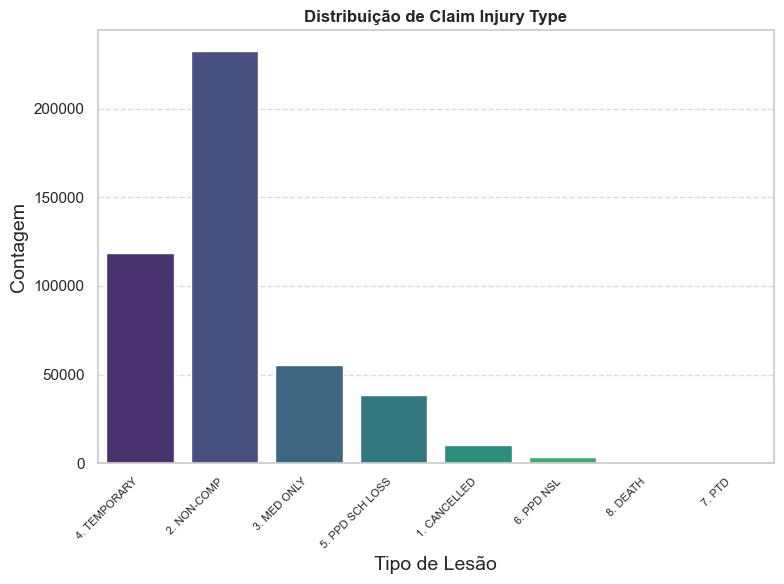

In [183]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=X_train, x=y_train, palette="viridis")

plt.title('Distribuição de Claim Injury Type', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Lesão', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart presents the distribution of the target variable <strong>Claim Injury Type</strong> in the dataset, categorizing the different types of injuries. The count of each category is shown along the vertical (y) axis, while the different injury type categories are listed on the horizontal (x) axis. Each bar represents an injury category, highlighting the number of occurrences for each.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The category <strong>2. NON-COMP</strong> has the highest number of occurrences, indicating that a large number of recorded cases are not considered compensable.</li>
    <li><strong>4. TEMPORARY</strong> and <strong>3. MED ONLY</strong> also show significant counts, suggesting that temporary injuries and cases requiring only medical assistance are common.</li>
    <li>The categories <strong>7. PTD</strong> (Permanent Total Disability) and <strong>8. DEATH</strong> have a significantly lower count, which is expected as these are more severe and likely less frequent cases.</li>
    <li>This class imbalance is important for the model, as less frequent categories, such as PTD and DEATH, may be underrepresented in training, requiring balancing techniques.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Understanding class distribution allows for measures to address possible imbalances that could affect predictive model performance. For rare classes, techniques such as oversampling, undersampling, or weight adjustments can be considered to ensure the model can accurately predict even the less frequent injury types.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📈 Secondary Target Variable Distribution (Agreement Reached)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Start by observing the class distribution in the target variable <code>Agreement Reached</code>. This helps identify potential class imbalances, which is essential to determine if data balancing techniques will be necessary before training the model.
</p>

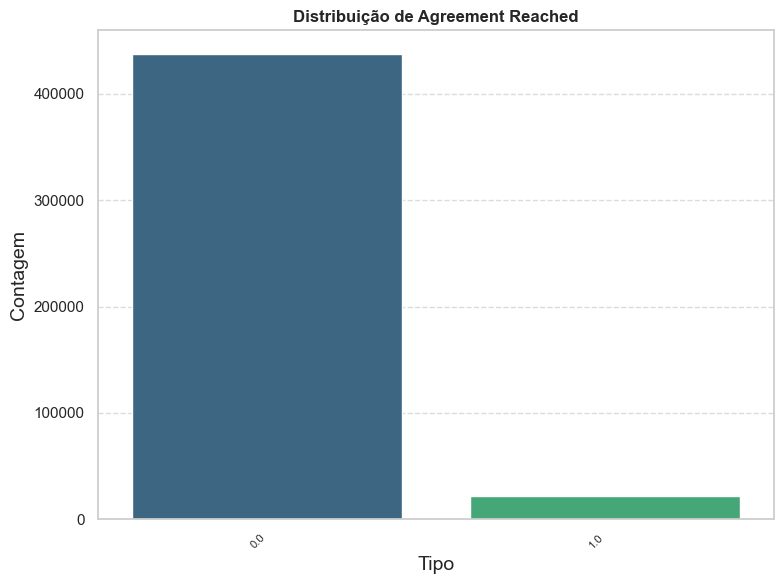

In [184]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=X_train_ar, x=y_train_ar, palette="viridis")

plt.title('Distribuição de Agreement Reached', fontsize=12, fontweight='bold')
plt.xlabel('Tipo', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart presents the distribution of the target variable <strong>Agreement Reached</strong> in the dataset. The count of each category is shown along the vertical (y) axis, while the two categories (0.0 and 1.0) are listed on the horizontal (x) axis. Each bar highlights the number of occurrences for each category.
</p>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The category <strong>0.0</strong> has an overwhelmingly higher count, representing the majority class with over 400,000 occurrences.</li>
    <li>The category <strong>1.0</strong> is significantly smaller, accounting for only a small fraction of the data.</li>
    <li>This severe class imbalance may affect model training, as models could become biased towards predicting the majority class (0.0).</li>
    <li>Techniques such as <strong>oversampling</strong> (e.g., SMOTE), <strong>undersampling</strong>, or class weight adjustments can help address this imbalance.</li>
</ul>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The distribution highlights a significant imbalance in the dataset. Addressing this issue is essential for building robust and fair predictive models. Balancing techniques should be considered to ensure the minority class (<strong>1.0</strong>) is adequately represented during training, improving the model's ability to predict both classes accurately.
</p>



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📈 Terciary Target Variable Distribution (WCB Decision)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Description:</strong> Start by observing the class distribution in the target variable <code>WCB Decision</code>. This helps identify potential class imbalances, which is essential to determine if data balancing techniques will be necessary before training the model.
</p>

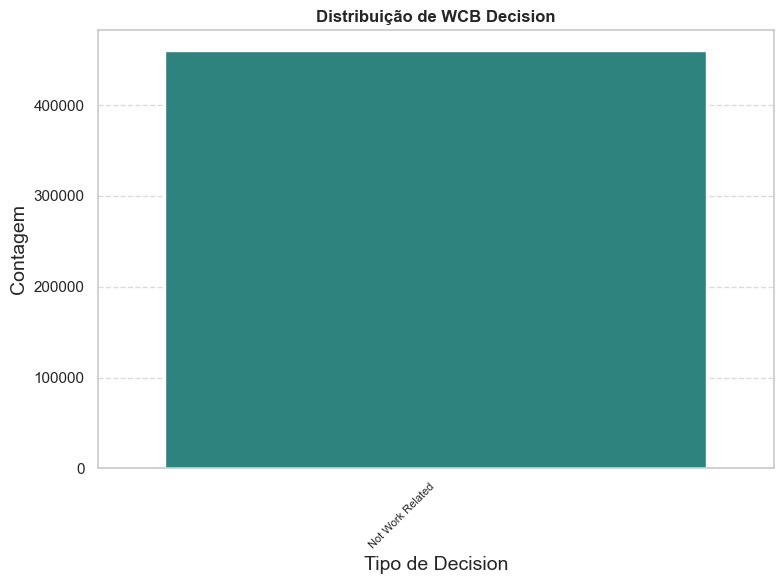

In [185]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=X_train_wcb, x=y_train_wcb, palette="viridis")

plt.title('Distribuição de WCB Decision', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Decision', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart shows the distribution of the variable <strong>WCB Decision</strong> in the dataset. The vertical (y) axis represents the count of occurrences, while the horizontal (x) axis displays the decision type. 
</p>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The bar chart indicates that the category <strong>Not Work Related</strong> accounts for the vast majority of cases.</li>
    <li>There are no other decision types visible, which suggests that the dataset may be highly imbalanced or lacking diversity in this variable.</li>
    <li>This imbalance could impact analysis or machine learning tasks, as the absence of other decision types reduces variability and predictive power.</li>
</ul>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Implications:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The dominance of the <strong>Not Work Related</strong> category highlights the need for careful consideration in downstream tasks. If this variable is to be used for classification or prediction:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>Data balancing techniques like oversampling or undersampling may be required to address the lack of diversity.</li>
    <li>Alternative strategies could involve collecting more data to include additional decision types, if applicable.</li>
</ul>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The current distribution reveals a significant class imbalance, with the <strong>Not Work Related</strong> category dominating the dataset. Addressing this imbalance will be critical to ensure fair and effective analysis or model training.
</p>



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Age Distribution at Time of Injury (Age at Injury)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Age at the time of injury can impact the type of injury. Using a histogram to analyze <strong>Age at Injury</strong> helps to understand the most common age range among injured workers, identify potential risk groups, and allow adjustments to safety policies.
</p>

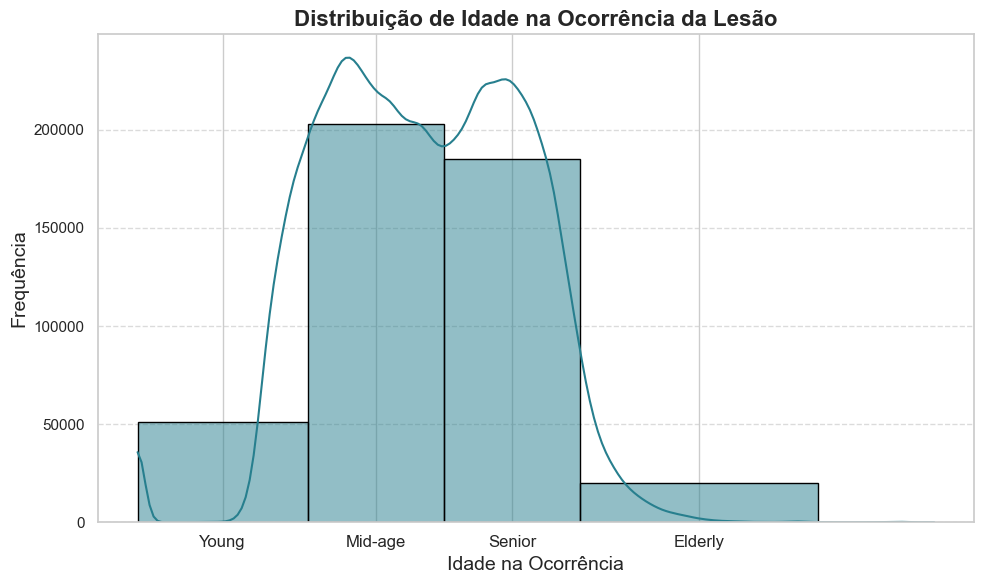

In [186]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

bins = [0, 25, 45, 65, 100]
labels = ['Young', 'Mid-age', 'Senior', 'Elderly']

sns.histplot(data=X_train['Age at Injury'], kde=True, bins=bins, palette="viridis",
             color=sns.color_palette("viridis")[2], edgecolor='black')

bin_centers = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]

plt.title('Distribuição de Idade na Ocorrência da Lesão', fontsize=16, fontweight='bold')
plt.xlabel('Idade na Ocorrência', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(bin_centers, labels, fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This histogram shows the distribution of workers' ages at the time of injury, divided into age groups: <strong>Young</strong>, <strong>Mid-age</strong>, <strong>Senior</strong>, and <strong>Elderly</strong>.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of injuries occur among workers in the <strong>Mid-age</strong> and <strong>Senior</strong> groups, with peaks in frequency in these age ranges.</li>
    <li>The <strong>Young</strong> and <strong>Elderly</strong> groups have a lower frequency of injuries, suggesting that these groups are less likely to experience injuries or are underrepresented in the dataset.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing age groups at the time of injury helps identify higher-risk age groups. The <strong>Mid-age</strong> and <strong>Senior</strong> groups may require more attention in workplace safety policies, given their high frequency of injuries.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    👤 Distribution by Gender
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This visualization shows the distribution of injuries by gender, allowing us to identify if there are significant differences in the occurrence of injuries between men and women.
</p>

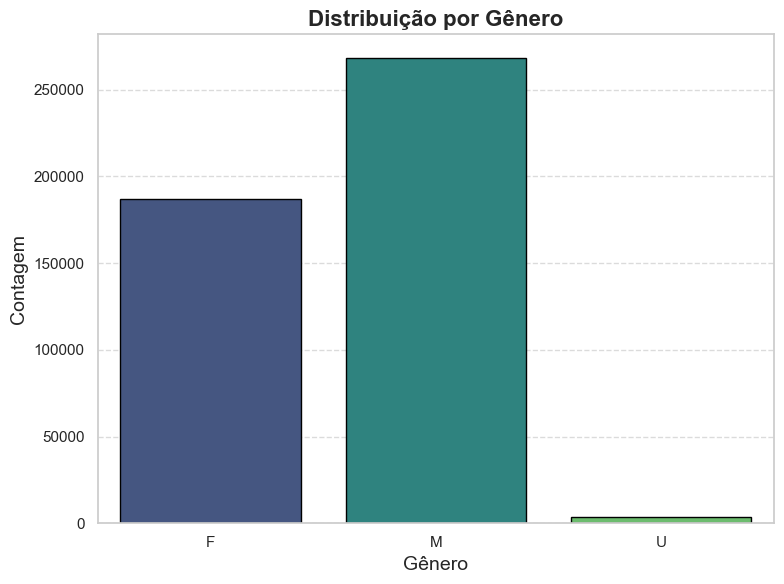

In [187]:
X_train['Gender'] = X_train['Gender'].replace('X', 'U')
X_val['Gender'] = X_val['Gender'].replace('X', 'U')
data_test['Gender'] = data_test['Gender'].replace('X', 'U')

X_train_ar['Gender'] = X_train_ar['Gender'].replace('X', 'U')
X_val_ar['Gender'] = X_val_ar['Gender'].replace('X', 'U')
data_test_ar['Gender'] = data_test_ar['Gender'].replace('X', 'U')

X_train_wcb['Gender'] = X_train_wcb['Gender'].replace('X', 'U')
X_val_wcb['Gender'] = X_val_wcb['Gender'].replace('X', 'U')
data_test_wcb['Gender'] = data_test_wcb['Gender'].replace('X', 'U')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.countplot(data=X_train, x='Gender', palette="viridis", edgecolor='black')

plt.title('Distribuição por Gênero', fontsize=16, fontweight='bold')
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This bar chart shows the distribution of injuries across different genders. The gender categories are represented by <strong>F</strong> (Female), <strong>M</strong> (Male), and <strong>X</strong> (Unknown).
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The majority of injuries occur among <strong>Male (M)</strong> workers, followed by <strong>Female (F)</strong> workers.</li>
    <li>A small proportion of injuries is recorded as <strong>X (Unknown)</strong>, indicating that the gender was not reported or classified.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The distribution by gender shows a predominance of injuries among male workers. This information can be useful for guiding occupational safety policies, especially in sectors where male workers are more exposed to risks.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🏢 Distribution of Industry Sectors (Industry Code Description)
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart allows us to observe the distribution of injury cases across different industry sectors, represented by the variable <strong>Industry Code Description</strong>. Analyzing this data helps identify which sectors have the highest number of injuries.
</p>

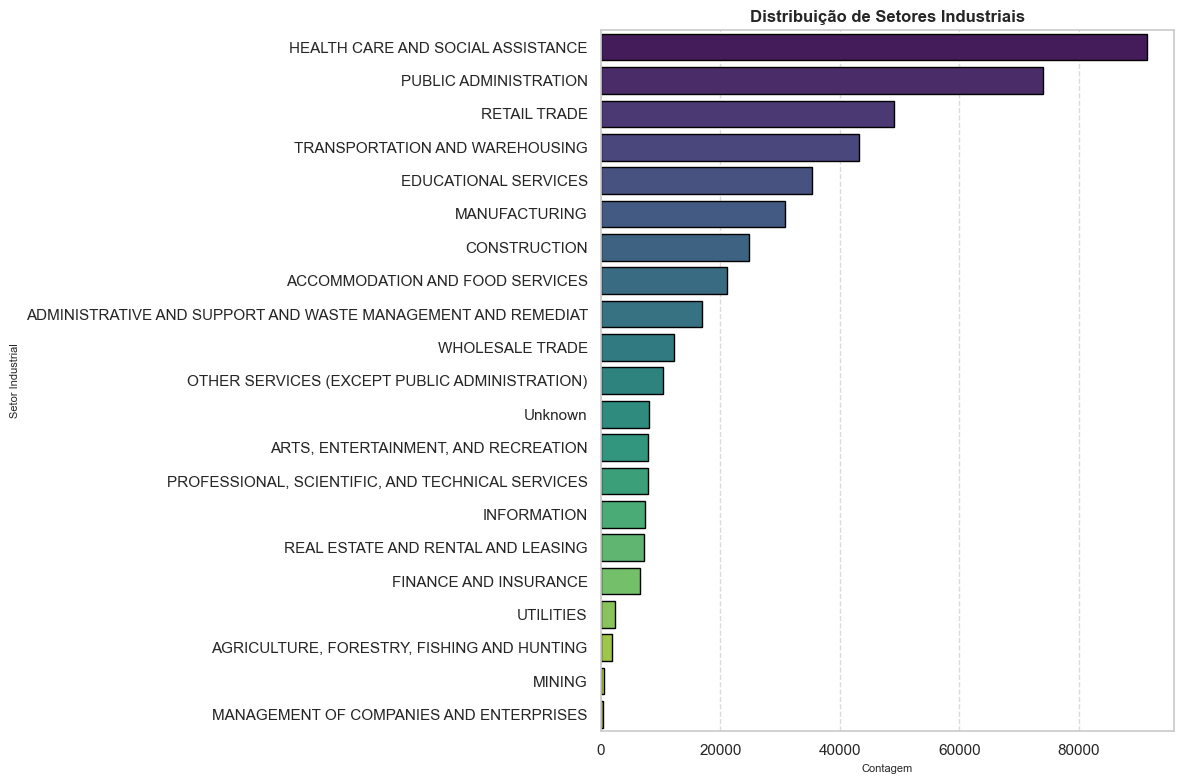

In [188]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.countplot(y='Industry Code Description', data=X_train,
              order=X_train['Industry Code Description'].value_counts().index,
              palette="viridis", edgecolor='black')

plt.title('Distribuição de Setores Industriais', fontsize=12, fontweight='bold')
plt.xlabel('Contagem', fontsize=8)
plt.ylabel('Setor Industrial', fontsize=8)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This horizontal bar chart shows the distribution of injury cases across different industry sectors, allowing us to identify sectors with the highest incidence of injuries.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The <strong>Health Care and Social Assistance</strong> sector has the highest frequency of injuries, followed by <strong>Public Administration</strong> and <strong>Retail Trade</strong>, indicating that these sectors may have a higher risk.</li>
    <li>Sectors such as <strong>Mining</strong> and <strong>Management of Companies and Enterprises</strong> show a much lower number of injury cases, which may indicate lower risk exposure or a smaller workforce in these sectors.</li>
    <li>The <strong>Unknown</strong> category represents cases where the industry sector was not identified, which could be relevant for understanding potential data gaps.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Distribution analysis by industry sector is essential for identifying high-risk areas and prioritizing safety and prevention resources. Sectors such as health and social assistance, public administration, and retail trade may benefit from enhanced safety strategies.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💼 Relationship between Average Weekly Wage and Claim Injury Type
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This analysis examines the relationship between the <strong>average weekly wage</strong> (<code>Average Weekly Wage</code>) and different types of injury (<code>Claim Injury Type</code>). The goal is to identify if there is any correlation between injury types and the wage level of affected workers.
</p>

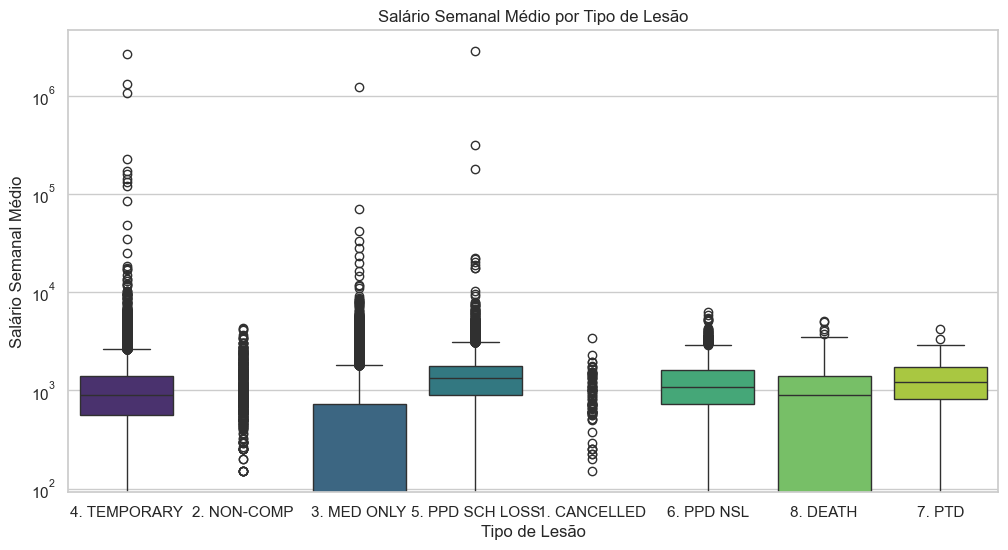

In [189]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, y=X_train['Average Weekly Wage'], palette="viridis")

plt.yscale('log')

plt.title('Salário Semanal Médio por Tipo de Lesão')
plt.xlabel('Tipo de Lesão')
plt.ylabel('Salário Semanal Médio')

plt.show()


<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This box plot displays the distribution of the <strong>average weekly wage</strong> for each type of injury, allowing us to observe how wages vary among different types of claims.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>Injury types <strong>4. TEMPORARY</strong> and <strong>3. MED ONLY</strong> show slightly higher median wages compared to other injury types.</li>
    <li>The injury type <strong>8. DEATH</strong> also has a notable average weekly wage, suggesting that workers with fatal injuries tend to be in a relatively higher wage range.</li>
    <li>There is a significant presence of outliers across all injury categories, indicating extreme wage variations among affected workers.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Analyzing the relationship between wages and injury types helps to understand if certain injury types affect workers in different wage brackets. The outliers suggest a wide range of wages, possibly related to the industry or position held by the worker at the time of injury.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💼 Relationship between Average Weekly Wage and Agreement Reached
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This analysis examines the relationship between the <strong>average weekly wage</strong> (<code>Average Weekly Wage</code>) and different types of injury (<code>Agreement Reached</code>). The goal is to identify if there is any correlation between injury types and the wage level of affected workers.
</p>

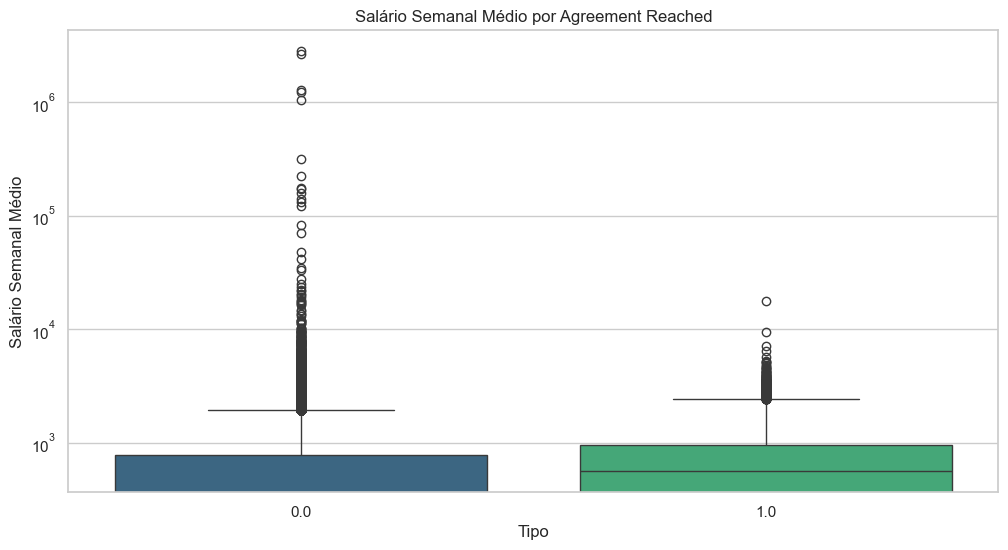

In [190]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train_ar, y=X_train['Average Weekly Wage'], palette="viridis")

plt.yscale('log')

plt.title('Salário Semanal Médio por Agreement Reached')
plt.xlabel('Tipo')
plt.ylabel('Salário Semanal Médio')

plt.show()

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    💼 Relationship between Average Weekly Wage and WCB Decision
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This analysis examines the relationship between the <strong>average weekly wage</strong> (<code>Average Weekly Wage</code>) and different types of injury (<code>WCB Decision</code>). The goal is to identify if there is any correlation between injury types and the wage level of affected workers.
</p>

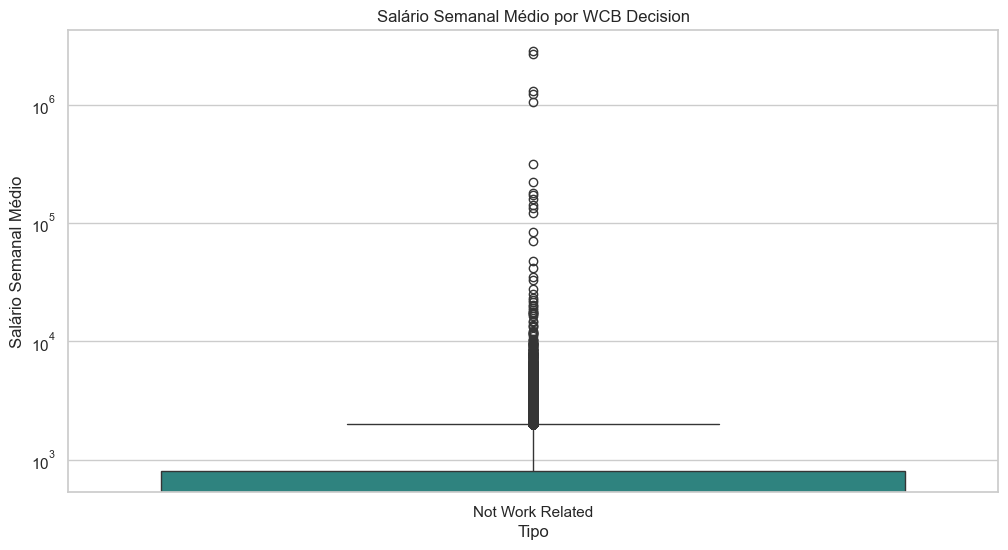

In [191]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train_wcb, y=X_train['Average Weekly Wage'], palette="viridis")

plt.yscale('log')

plt.title('Salário Semanal Médio por WCB Decision')
plt.xlabel('Tipo')
plt.ylabel('Salário Semanal Médio')

plt.show()


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    🚨 Outlier Detection
</h2>
<hr style="border: 1px solid #4A90E2;">
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Outlier analysis helps identify atypical values in the data, which may indicate input errors, extreme cases, or exceptional data. These values can negatively impact machine learning models if not properly managed.
</p>


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 28px; text-shadow: 1px 1px #D1D1D1;">
    📊 Interquartile Range (IQR) Method
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Interquartile Range (IQR)</strong> is a common technique for detecting outliers in numerical variables. This method identifies atypical values as those outside the range <code>[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]</code>, where:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Q1</strong> is the first quartile (25th percentile) of the data.</li>
    <li><strong>Q3</strong> is the third quartile (75th percentile) of the data.</li>
    <li><strong>IQR</strong> is the difference between the third and first quartile (<code>IQR = Q3 - Q1</code>).</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Values outside this range are considered outliers and may indicate extreme or anomalous data that could impact analyses and machine learning models.
</p>

In [192]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index 

In [193]:
numeric_columns = X_train.select_dtypes(include=['number']).columns

outlier_indices = pd.Series(index=X_train.index, data=0)

for column in numeric_columns:
    outliers = detect_outliers_iqr(X_train, column)
    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers_iqm = X_train[outlier_indices > 9]

rows_with_multiple_outliers_iqm

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact,COVID and Industry,Injury Type Combined,Dispute_and_Rep
474566,2021-10-07,46.0,N,2022-06-08,Y,2121.929932,1974.0,2022-06-08,2022-11-23,STATE INSURANCE FUND,...,4502586.50,46.064411,0.693147,1.0,1.000000,9.005173e+05,0.002356,N_PUBLIC ADMINISTRATION,52.0_33.0_-9.0,N_Y
462293,2022-05-11,42.0,N,2022-05-18,Y,2615.610107,1979.0,2022-05-18,2022-05-12,STATE INSURANCE FUND,...,6841416.00,51.143036,1.098612,4.0,1.414214,3.420708e+06,0.001529,N_HEALTH CARE AND SOCIAL ASSISTANCE,10.0_74.0_-9.0,N_Y
317742,2021-08-25,55.0,Y,2021-09-03,Y,0.000000,0.0,2024-06-01,2024-05-31,ELECTRICAL EMPLOYERS,...,0.00,0.000000,0.693147,1.0,1.000000,0.000000e+00,1000000.000000,N_CONSTRUCTION,99.0_99.0_99.0,Y_Y
418124,2022-12-11,57.0,N,2022-03-04,Y,1345.000000,1965.0,2022-03-04,2022-05-27,GREATER NEW YORK MUTUAL,...,1809025.00,36.674240,1.098612,4.0,1.414214,1.809025e+06,0.001487,N_ACCOMMODATION AND FOOD SERVICES,49.0_56.0_-9.0,N_Y
590436,2022-12-15,56.0,N,2022-12-23,Y,3667.510010,1966.0,2022-12-23,2024-05-31,STATE INSURANCE FUND,...,13450630.00,60.559971,1.098612,4.0,1.414214,2.690126e+06,0.002727,N_HEALTH CARE AND SOCIAL ASSISTANCE,52.0_74.0_-9.0,N_Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78633,2020-06-04,24.0,N,2020-06-10,Y,1494.800049,0.0,2020-06-09,2020-07-09,LM INSURANCE CORP,...,2234427.25,38.662643,1.098612,4.0,1.414214,7.448091e+05,0.004014,N_TRANSPORTATION AND WAREHOUSING,43.0_85.0_32.0,N_Y
190992,2020-12-16,58.0,N,2021-01-22,Y,2038.329956,1962.0,2021-11-06,2021-01-14,"CNY OTHER THAN ED, HED WATER",...,4154789.00,45.147869,1.098612,4.0,1.414214,1.038697e+06,0.003925,N_PUBLIC ADMINISTRATION,49.0_27.0_53.0,N_Y
508057,2022-06-22,61.0,N,2022-08-04,Y,3776.129883,1977.0,2022-08-04,2024-05-31,"POLICE, FIRE, SANITATION",...,14259157.00,61.450222,0.693147,1.0,1.000000,2.037022e+06,0.001854,N_PUBLIC ADMINISTRATION,10.0_89.0_-9.0,N_Y
431620,2022-02-10,42.0,N,2022-03-28,Y,1378.130005,1979.0,2022-06-01,2022-03-16,"POLICE, FIRE, SANITATION",...,1899242.25,37.123173,0.693147,1.0,1.000000,1.899242e+06,0.000726,N_PUBLIC ADMINISTRATION,10.0_57.0_-9.0,N_Y


In [194]:
numeric_columns = X_train_ar.select_dtypes(include=['number']).columns

outlier_indices = pd.Series(index=X_train_ar.index, data=0)

for column in numeric_columns:
    outliers = detect_outliers_iqr(X_train_ar, column)
    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers_iqm_ar = X_train_ar[outlier_indices > 9]

rows_with_multiple_outliers_iqm_ar

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact,COVID and Industry,Injury Type Combined,Dispute_and_Rep
474566,2021-10-07,46.0,N,2022-06-08,Y,2121.929932,1974.0,2022-06-08,2022-11-23,STATE INSURANCE FUND,...,4502586.50,46.064411,0.693147,1.0,1.000000,9.005173e+05,0.002356,N_PUBLIC ADMINISTRATION,52.0_33.0_-9.0,N_Y
462293,2022-05-11,42.0,N,2022-05-18,Y,2615.610107,1979.0,2022-05-18,2022-05-12,STATE INSURANCE FUND,...,6841416.00,51.143036,1.098612,4.0,1.414214,3.420708e+06,0.001529,N_HEALTH CARE AND SOCIAL ASSISTANCE,10.0_74.0_-9.0,N_Y
317742,2021-08-25,55.0,Y,2021-09-03,Y,0.000000,0.0,2024-06-01,2024-05-31,ELECTRICAL EMPLOYERS,...,0.00,0.000000,0.693147,1.0,1.000000,0.000000e+00,1000000.000000,N_CONSTRUCTION,99.0_99.0_99.0,Y_Y
418124,2022-12-11,57.0,N,2022-03-04,Y,1345.000000,1965.0,2022-03-04,2022-05-27,GREATER NEW YORK MUTUAL,...,1809025.00,36.674240,1.098612,4.0,1.414214,1.809025e+06,0.001487,N_ACCOMMODATION AND FOOD SERVICES,49.0_56.0_-9.0,N_Y
590436,2022-12-15,56.0,N,2022-12-23,Y,3667.510010,1966.0,2022-12-23,2024-05-31,STATE INSURANCE FUND,...,13450630.00,60.559971,1.098612,4.0,1.414214,2.690126e+06,0.002727,N_HEALTH CARE AND SOCIAL ASSISTANCE,52.0_74.0_-9.0,N_Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78633,2020-06-04,24.0,N,2020-06-10,Y,1494.800049,0.0,2020-06-09,2020-07-09,LM INSURANCE CORP,...,2234427.25,38.662643,1.098612,4.0,1.414214,7.448091e+05,0.004014,N_TRANSPORTATION AND WAREHOUSING,43.0_85.0_32.0,N_Y
190992,2020-12-16,58.0,N,2021-01-22,Y,2038.329956,1962.0,2021-11-06,2021-01-14,"CNY OTHER THAN ED, HED WATER",...,4154789.00,45.147869,1.098612,4.0,1.414214,1.038697e+06,0.003925,N_PUBLIC ADMINISTRATION,49.0_27.0_53.0,N_Y
508057,2022-06-22,61.0,N,2022-08-04,Y,3776.129883,1977.0,2022-08-04,2024-05-31,"POLICE, FIRE, SANITATION",...,14259157.00,61.450222,0.693147,1.0,1.000000,2.037022e+06,0.001854,N_PUBLIC ADMINISTRATION,10.0_89.0_-9.0,N_Y
431620,2022-02-10,42.0,N,2022-03-28,Y,1378.130005,1979.0,2022-06-01,2022-03-16,"POLICE, FIRE, SANITATION",...,1899242.25,37.123173,0.693147,1.0,1.000000,1.899242e+06,0.000726,N_PUBLIC ADMINISTRATION,10.0_57.0_-9.0,N_Y


In [195]:
numeric_columns = X_train_wcb.select_dtypes(include=['number']).columns

outlier_indices = pd.Series(index=X_train_wcb.index, data=0)

for column in numeric_columns:
    outliers = detect_outliers_iqr(X_train_wcb, column)
    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers_iqm_wcb = X_train_wcb[outlier_indices > 9]

rows_with_multiple_outliers_iqm_wcb

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact,COVID and Industry,Injury Type Combined,Dispute_and_Rep
474566,2021-10-07,46.0,N,2022-06-08,Y,2121.929932,1974.0,2022-06-08,2022-11-23,STATE INSURANCE FUND,...,4502586.50,46.064411,0.693147,1.0,1.000000,9.005173e+05,0.002356,N_PUBLIC ADMINISTRATION,52.0_33.0_-9.0,N_Y
462293,2022-05-11,42.0,N,2022-05-18,Y,2615.610107,1979.0,2022-05-18,2022-05-12,STATE INSURANCE FUND,...,6841416.00,51.143036,1.098612,4.0,1.414214,3.420708e+06,0.001529,N_HEALTH CARE AND SOCIAL ASSISTANCE,10.0_74.0_-9.0,N_Y
317742,2021-08-25,55.0,Y,2021-09-03,Y,0.000000,0.0,2024-06-01,2024-05-31,ELECTRICAL EMPLOYERS,...,0.00,0.000000,0.693147,1.0,1.000000,0.000000e+00,1000000.000000,N_CONSTRUCTION,99.0_99.0_99.0,Y_Y
418124,2022-12-11,57.0,N,2022-03-04,Y,1345.000000,1965.0,2022-03-04,2022-05-27,GREATER NEW YORK MUTUAL,...,1809025.00,36.674240,1.098612,4.0,1.414214,1.809025e+06,0.001487,N_ACCOMMODATION AND FOOD SERVICES,49.0_56.0_-9.0,N_Y
590436,2022-12-15,56.0,N,2022-12-23,Y,3667.510010,1966.0,2022-12-23,2024-05-31,STATE INSURANCE FUND,...,13450630.00,60.559971,1.098612,4.0,1.414214,2.690126e+06,0.002727,N_HEALTH CARE AND SOCIAL ASSISTANCE,52.0_74.0_-9.0,N_Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78633,2020-06-04,24.0,N,2020-06-10,Y,1494.800049,0.0,2020-06-09,2020-07-09,LM INSURANCE CORP,...,2234427.25,38.662643,1.098612,4.0,1.414214,7.448091e+05,0.004014,N_TRANSPORTATION AND WAREHOUSING,43.0_85.0_32.0,N_Y
190992,2020-12-16,58.0,N,2021-01-22,Y,2038.329956,1962.0,2021-11-06,2021-01-14,"CNY OTHER THAN ED, HED WATER",...,4154789.00,45.147869,1.098612,4.0,1.414214,1.038697e+06,0.003925,N_PUBLIC ADMINISTRATION,49.0_27.0_53.0,N_Y
508057,2022-06-22,61.0,N,2022-08-04,Y,3776.129883,1977.0,2022-08-04,2024-05-31,"POLICE, FIRE, SANITATION",...,14259157.00,61.450222,0.693147,1.0,1.000000,2.037022e+06,0.001854,N_PUBLIC ADMINISTRATION,10.0_89.0_-9.0,N_Y
431620,2022-02-10,42.0,N,2022-03-28,Y,1378.130005,1979.0,2022-06-01,2022-03-16,"POLICE, FIRE, SANITATION",...,1899242.25,37.123173,0.693147,1.0,1.000000,1.899242e+06,0.000726,N_PUBLIC ADMINISTRATION,10.0_57.0_-9.0,N_Y



<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    📊 Visualization with Boxplots
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    <strong>Boxplots</strong> are an effective visual tool for identifying outliers in numerical variables. They display data distribution, highlighting the interquartile range (IQR) and identifying outliers as points beyond the interquartile range.
</p>
<p style="color: #4A90E2; font-size: 20px; line-height: 1.6; font-family: 'Arial', sans-serif; text-shadow: 1px 1px #D1D1D1;">
    In boxplots:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The line inside the box represents the median of the data.</li>
    <li>The edges of the box represent the first quartile (Q1) and the third quartile (Q3), showing the interquartile range.</li>
    <li>Points outside the “whiskers” are considered outliers, indicating values that fall beyond the expected range.</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Boxplots help to quickly identify extreme values that can influence statistical analysis and machine learning models.
</p>

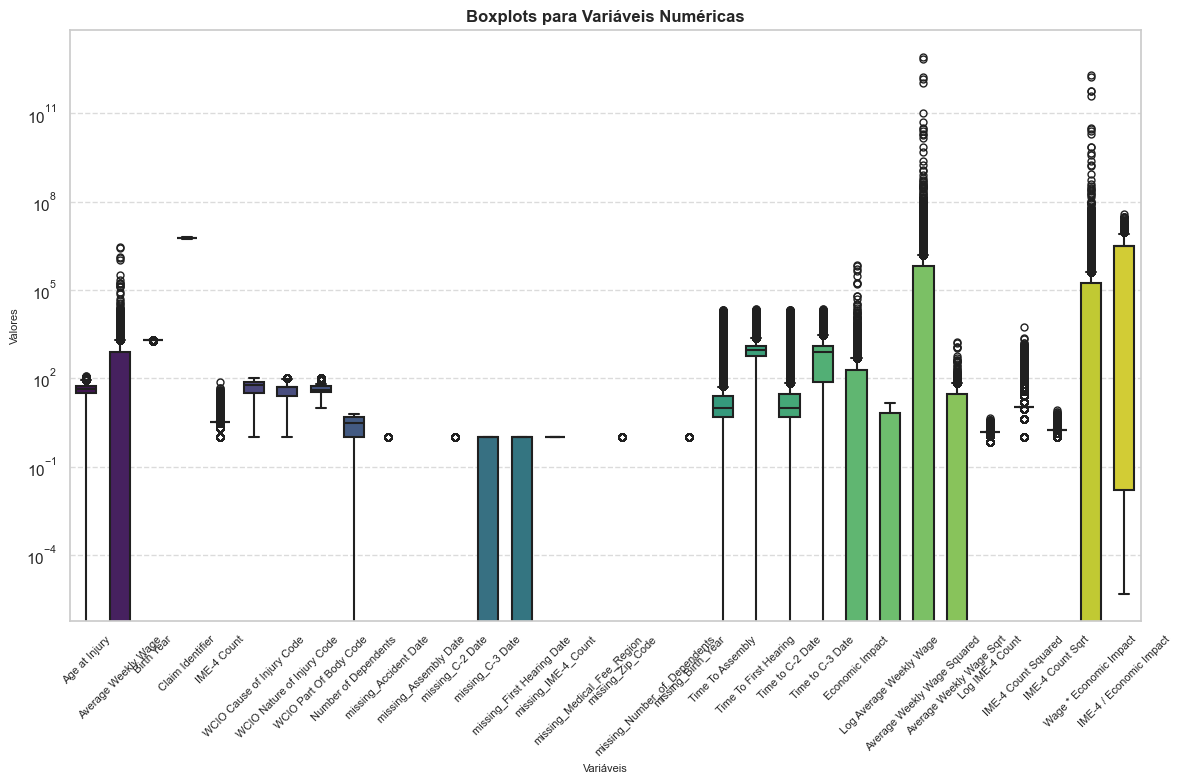

In [196]:
melted_data = X_train.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 8))

sns.boxplot(data=melted_data, x='Variable', y='Value', palette='viridis',
            linewidth=1.5, fliersize=5, width=0.6)

plt.yscale('log')

plt.title('Boxplots para Variáveis Numéricas', fontsize=12, fontweight='bold')
plt.xlabel('Variáveis', fontsize=8)
plt.ylabel('Valores', fontsize=8)

plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This chart presents boxplots for the numerical variables in the dataset, allowing for a visual identification of outliers. Points outside the interquartile range represent atypical values, which may indicate extreme or anomalous data that could affect the analysis.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li><strong>Average Weekly Wage</strong> and <strong>Economic Impact</strong> show several outliers, indicating a broad variation in these data, possibly due to different salary ranges or varying economic impacts.</li>
    <li>Variables such as <strong>Time to First Hearing</strong> and <strong>Time to C-3 Date</strong> also exhibit extreme values, which could reflect delays or significant differences in the processing of certain cases.</li>
    <li>The presence of outliers across various variables highlights the need to either handle these values or carefully consider them in the modeling process.</li>
</ul>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Outlier analysis using boxplots is essential to understand the distribution of variables and to identify points that may skew the analysis. Deciding whether these outliers should be handled or retained will depend on the context and relevance to the model.
</p>

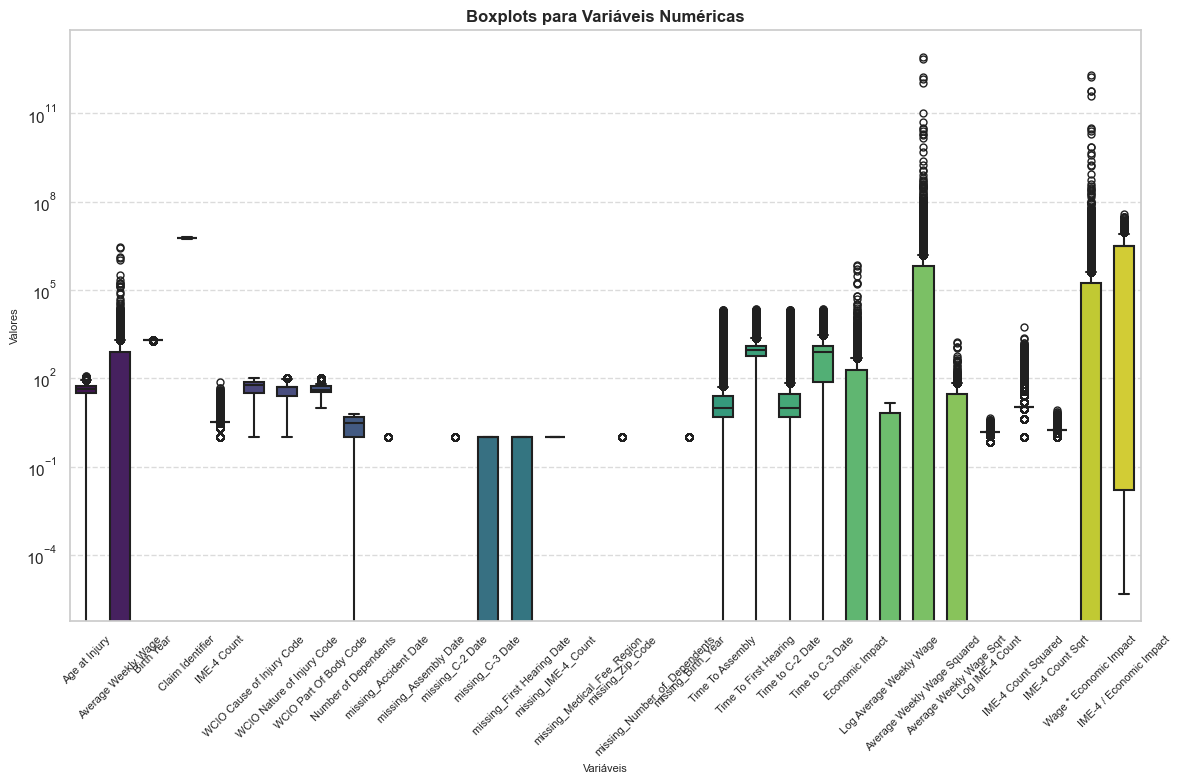

In [197]:
melted_data = X_train_ar.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 8))

sns.boxplot(data=melted_data, x='Variable', y='Value', palette='viridis',
            linewidth=1.5, fliersize=5, width=0.6)

plt.yscale('log')

plt.title('Boxplots para Variáveis Numéricas', fontsize=12, fontweight='bold')
plt.xlabel('Variáveis', fontsize=8)
plt.ylabel('Valores', fontsize=8)

plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

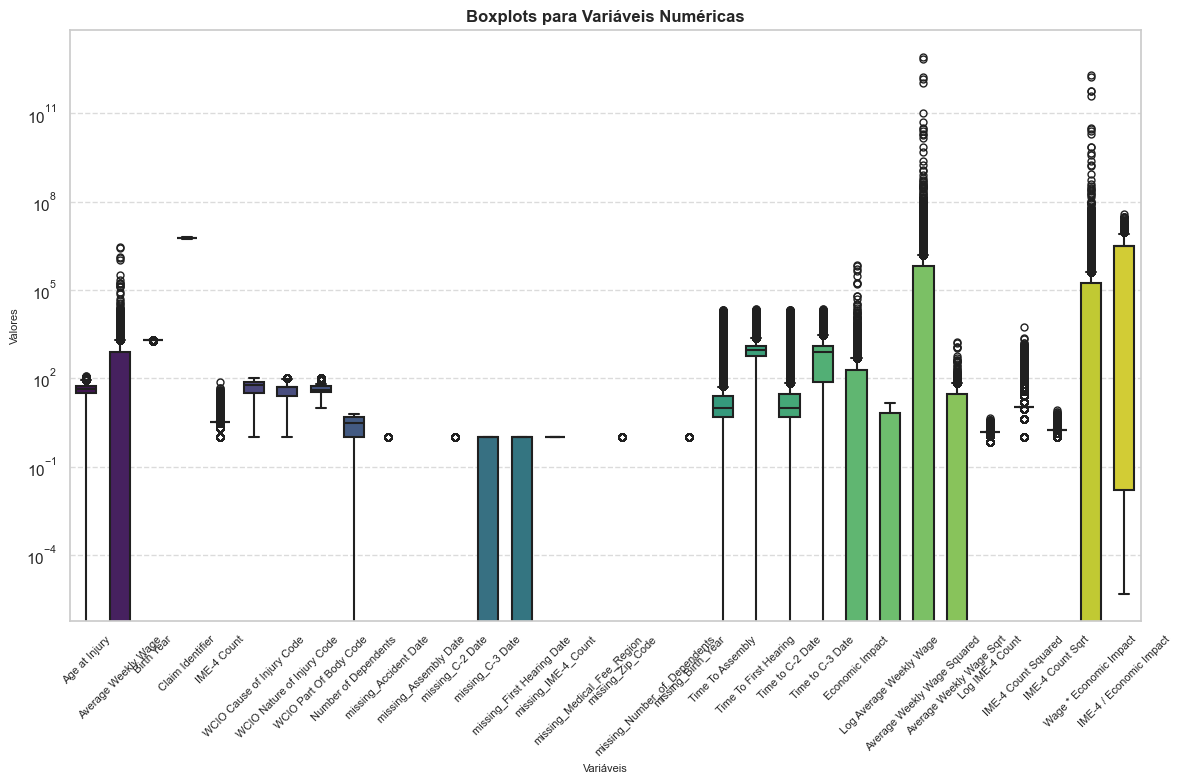

In [198]:
melted_data = X_train_wcb.melt(value_vars=numeric_columns, var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 8))

sns.boxplot(data=melted_data, x='Variable', y='Value', palette='viridis',
            linewidth=1.5, fliersize=5, width=0.6)

plt.yscale('log')

plt.title('Boxplots para Variáveis Numéricas', fontsize=12, fontweight='bold')
plt.xlabel('Variáveis', fontsize=8)
plt.ylabel('Valores', fontsize=8)

plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    🔍 Z-Score for Outlier Detection
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The <strong>Z-score</strong> is an effective technique for identifying outliers in numerical data by measuring the distance of a value from the mean, expressed in standard deviations. Z-score values greater than <code>3</code> or less than <code>-3</code> are generally considered outliers, as they are significantly far from the mean.
</p>
<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Z-Score Calculation:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>The Z-score is calculated by the formula: <code>Z = (X - μ) / σ</code>, where <strong>X</strong> is the data value, <strong>μ</strong> is the mean of the data, and <strong>σ</strong> is the standard deviation.</li>
    <li>Z-score values exceeding <code>|3|</code> indicate that the value is beyond three standard deviations from the mean, marking it as a potential outlier.</li>
</ul>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    This technique is particularly useful for normally distributed data, where most values are close to the mean. Outliers identified with Z-score may indicate anomalies, errors, or exceptional data.
</p>

In [199]:
outlier_indices = pd.Series(index=X_train.index, data=0)

for column in numeric_columns:
    z_scores = np.abs(stats.zscore(X_train[column]))

    outliers = X_train[z_scores > 3].index

    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers_Z = X_train[outlier_indices > 9]
rows_with_multiple_outliers_Z

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact,COVID and Industry,Injury Type Combined,Dispute_and_Rep


In [200]:
outlier_indices = pd.Series(index=X_train_ar.index, data=0)

for column in numeric_columns:
    z_scores = np.abs(stats.zscore(X_train_ar[column]))

    outliers = X_train_ar[z_scores > 3].index

    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers_Z_ar = X_train_ar[outlier_indices > 9]
rows_with_multiple_outliers_Z_ar

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact,COVID and Industry,Injury Type Combined,Dispute_and_Rep


In [201]:
outlier_indices = pd.Series(index=X_train_wcb.index, data=0)

for column in numeric_columns:
    z_scores = np.abs(stats.zscore(X_train_wcb[column]))

    outliers = X_train_wcb[z_scores > 3].index

    outlier_indices.loc[outliers] += 1

rows_with_multiple_outliers_Z_wcb = X_train_wcb[outlier_indices > 9]
rows_with_multiple_outliers_Z_wcb

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney_Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Average Weekly Wage Squared,Average Weekly Wage Sqrt,Log IME-4 Count,IME-4 Count Squared,IME-4 Count Sqrt,Wage * Economic Impact,IME-4 / Economic Impact,COVID and Industry,Injury Type Combined,Dispute_and_Rep


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Strategies for Handling Outliers
</h2>
<hr style="border: 1px solid #4A90E2;">

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    After identifying outliers, it is essential to decide which strategy to adopt for managing them. Below are some common approaches for handling outliers:
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    1. Retain the Outliers
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    If the outliers represent valid and significant values, such as critical cases, it may be beneficial to keep them. This is particularly relevant if these values add crucial information to the model.
</p>

<h3 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    2. Remove the Outliers
</h3>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    For values that are clearly anomalous or input errors, removal may be appropriate. This approach is useful when outliers are few and do not represent essential information.
</p>

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Our chosen strategy was to remove outliers based on an evaluation of each model we ran. For each model, we compared all rows and decided to remove rows where more than 9 variables were identified as outliers. We selected 9 as the threshold because choosing fewer columns would lead to the removal of a significant number of rows from the dataset, potentially discarding valuable data. This threshold allows us to retain a reasonable number of rows while minimizing the impact of outliers on the models.
</p>

In [202]:
indexes_outliers_iqm = X_train[
    X_train.isin(rows_with_multiple_outliers_iqm.to_dict(orient='list')).all(axis=1)
].index

indexes_outliers_Z = X_train[
    X_train.isin(rows_with_multiple_outliers_Z.to_dict(orient='list')).all(axis=1)
].index

indexes_to_remove = indexes_outliers_iqm.union(indexes_outliers_Z)

X_train = X_train.drop(indexes_to_remove, axis=0)
y_train = y_train.drop(indexes_to_remove, axis=0)

In [203]:
indexes_outliers_iqm = X_train_ar[
    X_train_ar.isin(rows_with_multiple_outliers_iqm_ar.to_dict(orient='list')).all(axis=1)
].index

indexes_outliers_Z = X_train_ar[
    X_train_ar.isin(rows_with_multiple_outliers_Z_ar.to_dict(orient='list')).all(axis=1)
].index

indexes_to_remove = indexes_outliers_iqm.union(indexes_outliers_Z)

X_train_ar = X_train_ar.drop(indexes_to_remove, axis=0)
y_train_ar = y_train_ar.drop(indexes_to_remove, axis=0)

In [204]:
indexes_outliers_iqm = X_train_wcb[
    X_train_wcb.isin(rows_with_multiple_outliers_iqm_wcb.to_dict(orient='list')).all(axis=1)
].index

indexes_outliers_Z = X_train_wcb[
    X_train_wcb.isin(rows_with_multiple_outliers_Z_wcb.to_dict(orient='list')).all(axis=1)
].index

indexes_to_remove = indexes_outliers_iqm.union(indexes_outliers_Z)

X_train_wcb = X_train_wcb.drop(indexes_to_remove, axis=0)
y_train_wcb = y_train_wcb.drop(indexes_to_remove, axis=0)

<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Extra Insights and Alterations
</h2>
<hr style="border: 1px solid #4A90E2;">


<h2 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 24px; text-shadow: 1px 1px #D1D1D1;">
    Transform Data Types
</h2>

In [205]:
# Selecionar colunas de tipo 'object' no conjunto de treino
object_columns_train = X_train.select_dtypes(include=['object']).columns

# Selecionar colunas de tipo 'object' no conjunto de validação
object_columns_val = X_val.select_dtypes(include=['object']).columns

# Selecionar colunas de tipo 'object' no conjunto de teste
object_columns_test = data_test.select_dtypes(include=['object']).columns


In [206]:
# Converter colunas de 'object' para 'category' no conjunto de treino
for column in object_columns_train:
    X_train[column] = X_train[column].astype('category')

# Converter colunas de 'object' para 'category' no conjunto de validação
for column in object_columns_val:
    X_val[column] = X_val[column].astype('category')

# Converter colunas de 'object' para 'category' no conjunto de teste
for column in object_columns_test:
    data_test[column] = data_test[column].astype('category')


In [207]:
# Selecionar colunas de tipo 'object' no conjunto de treino
object_columns_train = X_train_ar.select_dtypes(include=['object']).columns

# Selecionar colunas de tipo 'object' no conjunto de validação
object_columns_val = X_val_ar.select_dtypes(include=['object']).columns

# Selecionar colunas de tipo 'object' no conjunto de teste
object_columns_test = data_test_ar.select_dtypes(include=['object']).columns

In [208]:
# Converter colunas de 'object' para 'category' no conjunto de treino
for column in object_columns_train:
    X_train_ar[column] = X_train_ar[column].astype('category')

# Converter colunas de 'object' para 'category' no conjunto de validação
for column in object_columns_val:
    X_val_ar[column] = X_val_ar[column].astype('category')

# Converter colunas de 'object' para 'category' no conjunto de teste
for column in object_columns_test:
    data_test_ar[column] = data_test_ar[column].astype('category')


In [209]:
# Selecionar colunas de tipo 'object' no conjunto de treino
object_columns_train = X_train_wcb.select_dtypes(include=['object']).columns

# Selecionar colunas de tipo 'object' no conjunto de validação
object_columns_val = X_val_wcb.select_dtypes(include=['object']).columns

# Selecionar colunas de tipo 'object' no conjunto de teste
object_columns_test = data_test_wcb.select_dtypes(include=['object']).columns

In [210]:
# Converter colunas de 'object' para 'category' no conjunto de treino
for column in object_columns_train:
    X_train_wcb[column] = X_train_wcb[column].astype('category')

# Converter colunas de 'object' para 'category' no conjunto de validação
for column in object_columns_val:
    X_val_wcb[column] = X_val_wcb[column].astype('category')

# Converter colunas de 'object' para 'category' no conjunto de teste
for column in object_columns_test:
    data_test_wcb[column] = data_test_wcb[column].astype('category')


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Correlation Analysis
</h2>
<hr style="border: 1px solid #4A90E2;">


In [211]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [212]:
X_train_ar = X_train_ar.reset_index(drop=True)
X_val_ar = X_val_ar.reset_index(drop=True)
data_test_ar = data_test_ar.reset_index(drop=True)

In [213]:
X_train_wcb = X_train_wcb.reset_index(drop=True)
X_val_wcb = X_val_wcb.reset_index(drop=True)
data_test_wcb = data_test_wcb.reset_index(drop=True)

In [214]:
data_train_numerical = X_train.select_dtypes(include=['number'])

corr_matrix = data_train_numerical.corr()

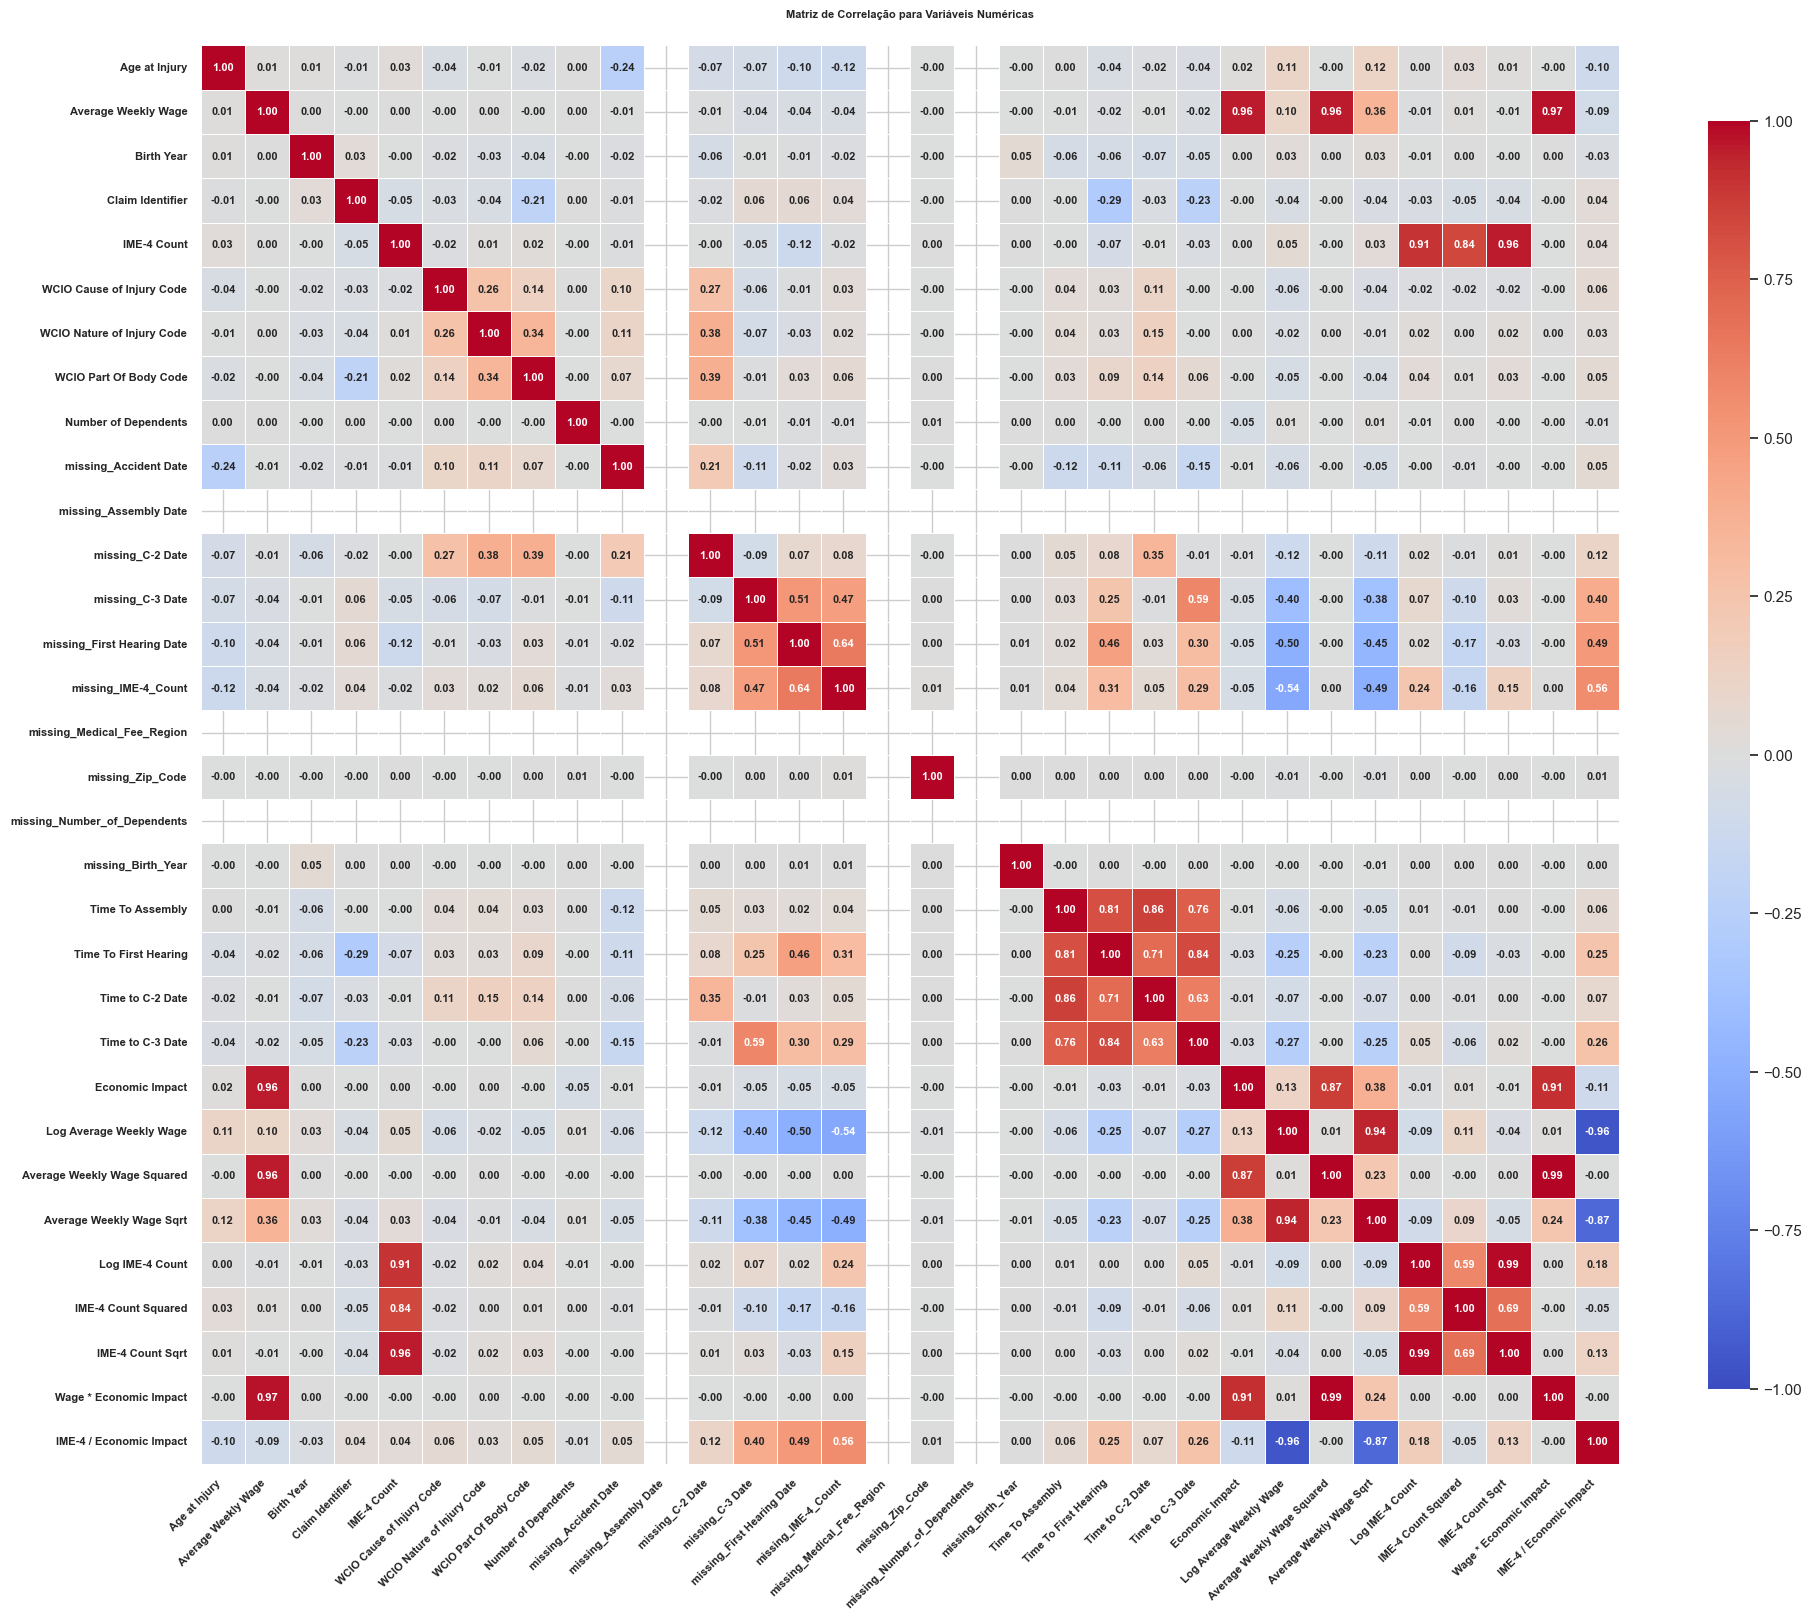

In [215]:
sns.set(style='whitegrid', font_scale=1.0)
plt.figure(figsize=(20, 18))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.7,
            square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30},
            annot_kws={'size': 8, 'weight': 'bold'})

plt.title('Matriz de Correlação para Variáveis Numéricas', fontsize=8, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8, weight='bold')
plt.yticks(fontsize=8, weight='bold')
plt.tight_layout()

plt.show()

<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The heatmap above represents the <strong>correlation matrix</strong> for numeric variables in the dataset. Correlations range from <strong>-1</strong> (perfect negative correlation) to <strong>1</strong> (perfect positive correlation), with values close to <strong>0</strong> indicating weak or no linear correlation. 
</p>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Analysis:
</h4>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>Diagonal values are all <strong>1.0</strong>, as each variable is perfectly correlated with itself.</li>
    <li>Variables like <strong>"Average Weekly Wage" and "Average Weekly Wage Squared"</strong> show a high positive correlation (~0.99), which indicates redundancy.</li>
    <li>Several <strong>"missing_" variables</strong> are correlated with each other (e.g., <strong>missing_C0 Date</strong> and <strong>missing_First Hearing Date</strong> have strong correlations).</li>
    <li>There are instances of <strong>negative correlations</strong>, such as between <strong>Age at Injury</strong> and <strong>Birth Year</strong> (-0.83), which makes sense due to their inverse relationship.</li>
    <li>The correlations between <strong>economic impact</strong> and wage-related variables, like <strong>"Log Average Weekly Wage"</strong>, show moderate to strong relationships (~0.50 to 0.60).</li>
</ul>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Key Observations:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The following patterns in the correlation matrix stand out:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>High correlation between <strong>Average Weekly Wage</strong> and its derived variables suggests multicollinearity, which may impact models like regression.</li>
    <li>Strong correlations among "missing_" variables may indicate systemic issues or dependencies in the missing data.</li>
    <li>Low correlations between some numeric variables (e.g., <strong>"IME-4 Count"</strong> and <strong>"Economic Impact"</strong>) highlight weak relationships that may not add significant predictive power.</li>
</ul>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Implications for Modeling:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    Based on the correlation matrix, the following actions are recommended:
</p>
<ul style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif; padding-left: 20px;">
    <li>Handle multicollinearity by removing or combining highly correlated variables (e.g., drop <strong>"Average Weekly Wage Squared"</strong> if it does not add value).</li>
    <li>Investigate the relationships among <strong>"missing_" variables</strong> to understand patterns in the missing data and their potential impact on the analysis.</li>
    <li>Focus on variables with strong correlations to the target variable (e.g., <strong>"Economic Impact"</strong>) to prioritize during feature selection.</li>
</ul>

<h4 style="color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 20px; text-shadow: 1px 1px #D1D1D1;">
    Conclusion:
</h4>
<p style="font-size: 18px; line-height: 1.6; font-family: 'Arial', sans-serif;">
    The correlation matrix reveals significant relationships, redundancies, and dependencies among numeric variables. Addressing multicollinearity and understanding the patterns in missing data are key steps to improving the quality of analysis and predictive models.
</p>


In [216]:
data_train_numerical = X_train_ar.select_dtypes(include=['number'])

corr_matrix = data_train_numerical.corr()

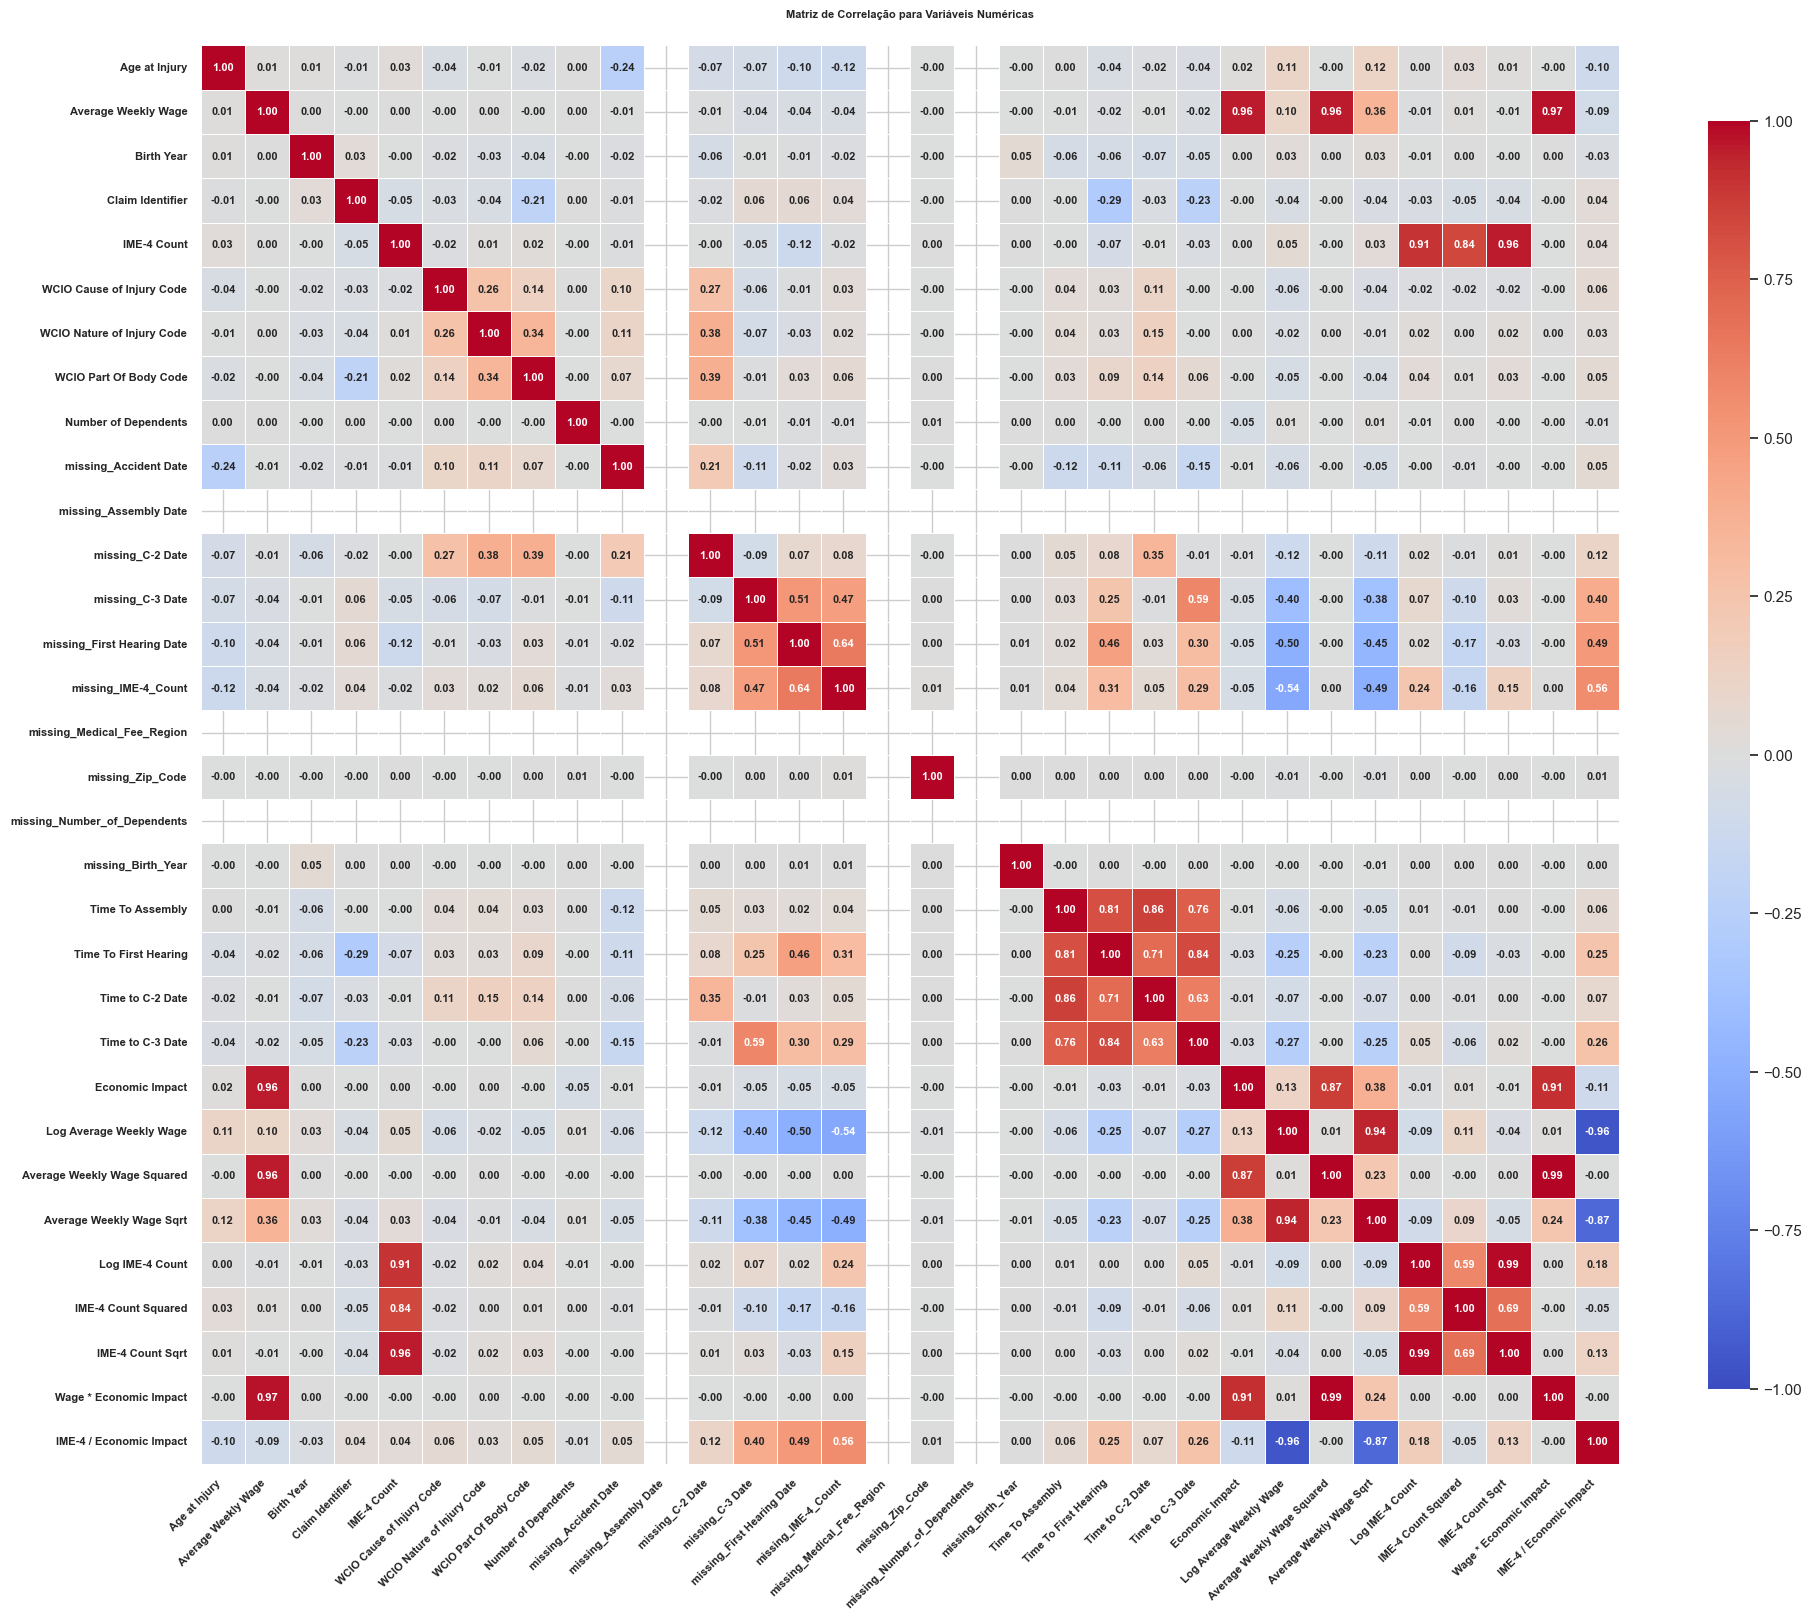

In [217]:
sns.set(style='whitegrid', font_scale=1.0)
plt.figure(figsize=(20, 18))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.7,
            square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30},
            annot_kws={'size': 8, 'weight': 'bold'})

plt.title('Matriz de Correlação para Variáveis Numéricas', fontsize=8, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8, weight='bold')
plt.yticks(fontsize=8, weight='bold')
plt.tight_layout()

plt.show()

In [218]:
data_train_numerical = X_train_ar.select_dtypes(include=['number'])

corr_matrix = data_train_numerical.corr()

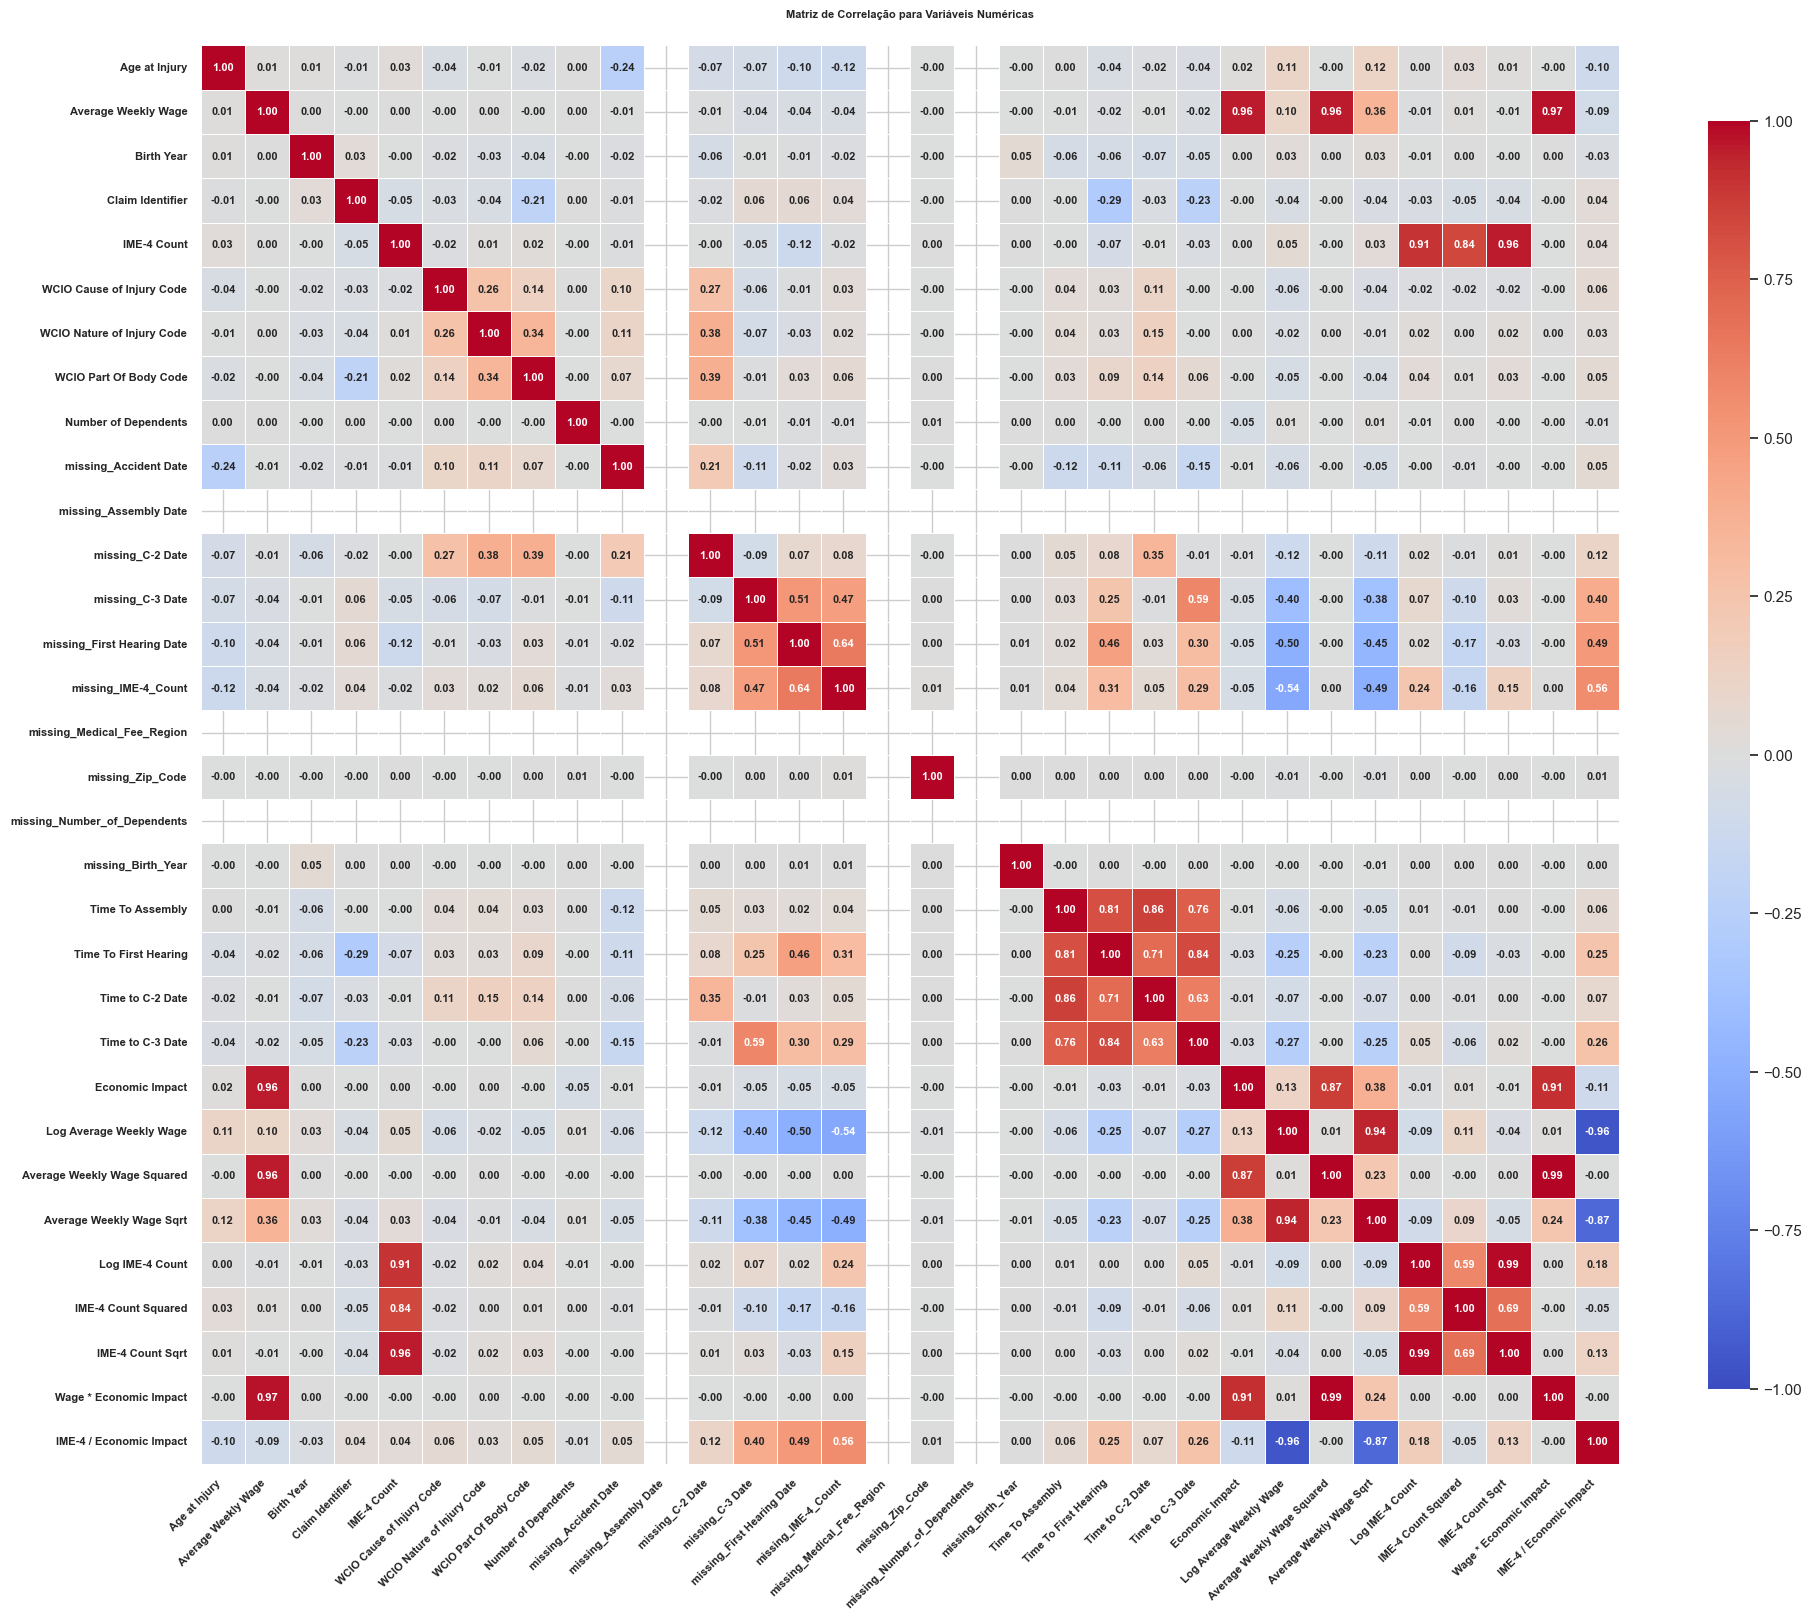

In [219]:
sns.set(style='whitegrid', font_scale=1.0)
plt.figure(figsize=(20, 18))

sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.7,
            square=True,
            cbar_kws={'shrink': 0.75, 'aspect': 30},
            annot_kws={'size': 8, 'weight': 'bold'})

plt.title('Matriz de Correlação para Variáveis Numéricas', fontsize=8, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=8, weight='bold')
plt.yticks(fontsize=8, weight='bold')
plt.tight_layout()

plt.show()


<h2 style="text-align: center; color: #4A90E2; font-family: 'Arial', sans-serif; font-size: 36px; text-shadow: 1px 1px #D1D1D1;">
    Download DataSet
</h2>
<hr style="border: 1px solid #4A90E2;">


In [220]:
X_train.to_csv("../data/X_train_post_EDA.csv", index=False)

In [221]:
X_train_ar.to_csv("../data/X_train_ar_post_EDA.csv", index=False)

In [222]:
X_train_wcb.to_csv("../data/X_train_wcb_post_EDA.csv", index=False)

In [223]:
X_val.to_csv("../data/X_val_post_EDA.csv", index=False)

In [224]:
X_val_ar.to_csv("../data/X_val_ar_post_EDA.csv", index=False)

In [225]:
X_val_wcb.to_csv("../data/X_val_wcb_post_EDA.csv", index=False)

In [226]:
y_val.to_csv("../data/y_val.csv", index=False)

In [227]:
y_val_ar.to_csv("../data/y_val_ar.csv", index=False)

In [228]:
y_val_wcb.to_csv("../data/y_val_wcb.csv", index=False)

In [229]:
y_train.to_csv("../data/y_train.csv", index=False)

In [230]:
y_train_ar.to_csv("../data/y_train_ar.csv", index=False)

In [231]:
y_train_wcb.to_csv("../data/y_train_wcb.csv", index=False)

In [232]:
data_test.to_csv("../data/data_test_post_EDA.csv", index=False)

In [233]:
data_test_ar.to_csv("../data/data_test_ar_post_EDA.csv", index=False)

In [234]:
data_test_wcb.to_csv("../data/data_test_wcb_post_EDA.csv", index=False)